In [1]:
import os
import sys
import waveformDumper
import numpy as np
import matplotlib.pyplot as plt
import struct
import pandas as pd

from matplotlib import colors
from matplotlib import ticker

In [328]:
import matplotlib

nice_fonts = {
    "text.usetex": True,
    "font.size": 18,
    "axes.formatter.limits": (-2, 4),
    'xtick.direction': 'in',
    'ytick.direction': 'in',
}

matplotlib.rcParams.update(nice_fonts)

c1 = '#dc2f18'
c2 = '#2d82b7'
#c3 = '#aaae8e'
c3 = '#885a89'
c4 = '#07004d'
mcols = [c2, c3, c4, 'maroon']

In [762]:
spevals = {}
speerrs = {}

In [329]:
dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24100/"

In [678]:
dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24098/"
runNo = 24098

src = 1
ch = 0
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch0 = np.concatenate([dat0, dat1])

del dat0, dat1

In [679]:
src = 1
ch = 7
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch7 = np.concatenate([dat0, dat1])

del dat0, dat1

In [680]:
dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24100/"
runNo = 24100
src = 2
ch = 10
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch10 = np.concatenate([dat0, dat1])

del dat0, dat1

In [681]:
src = 2
ch = 17
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch17 = np.concatenate([dat0, dat1])

del dat0, dat1

In [682]:
ch0.shape, ch7.shape, ch10.shape, ch17.shape

((5812, 50000), (5812, 50000), (5812, 50000), (5812, 50000))

In [683]:
evts = ch0.shape[0]
ch0 = ch0.reshape(evts*16, int(ch0.shape[1]/16))
ch7 = ch7.reshape(evts*16, int(ch7.shape[1]/16))
evts = ch10.shape[0]
ch10 = ch10.reshape(evts*16, int(ch10.shape[1]/16))
ch17 = ch17.reshape(evts*16, int(ch17.shape[1]/16))

In [684]:
ch0 = ch0[:, 2350:2800]
ch7 = ch7[:, 2350:2800]
ch10 = ch10[:, 2350:2800]
ch17 = ch17[:, 2350:2800]

In [685]:
peds = np.array([np.argmax(np.bincount(ch0[i])) for i in range(len(ch0))])
peds = peds[:, np.newaxis]
ch0 = ch0 - peds

peds = np.array([np.argmax(np.bincount(ch7[i])) for i in range(len(ch7))])
peds = peds[:, np.newaxis]
ch7 = ch7 - peds

peds = np.array([np.argmax(np.bincount(ch10[i])) for i in range(len(ch10))])
peds = peds[:, np.newaxis]
ch10 = ch10 - peds

peds = np.array([np.argmax(np.bincount(ch17[i])) for i in range(len(ch17))])
peds = peds[:, np.newaxis]
ch17 = ch17 - peds

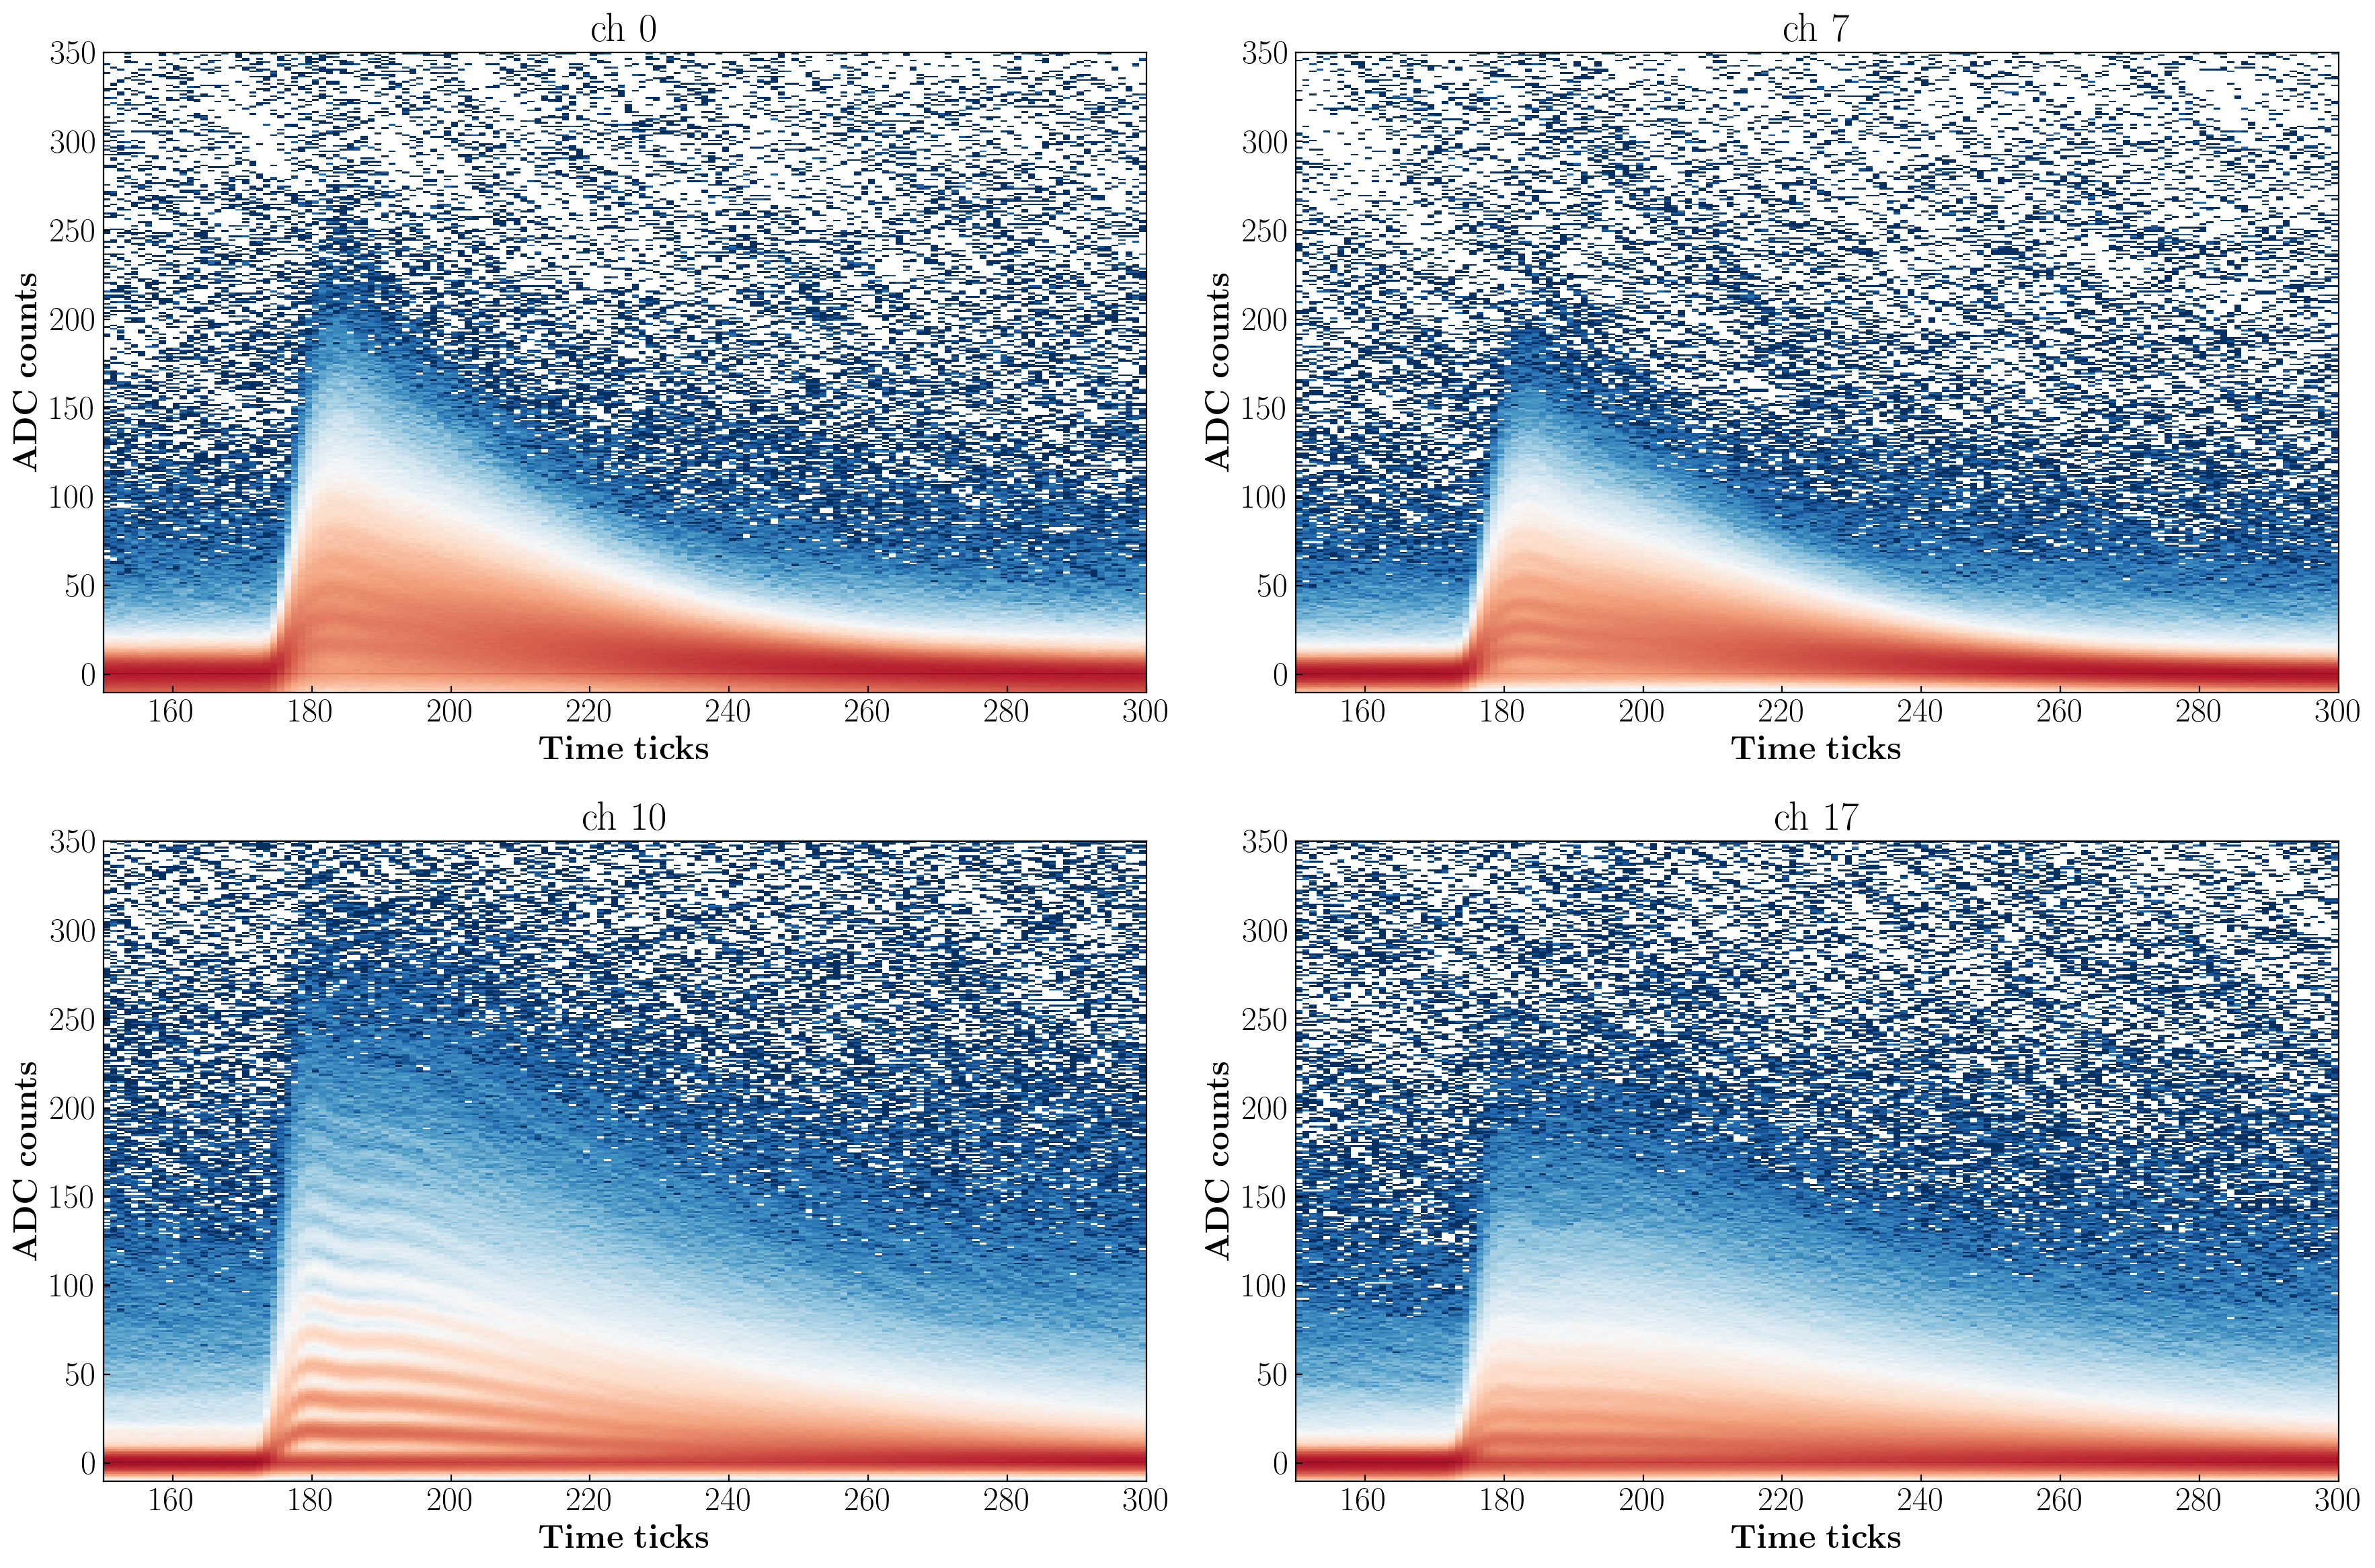

In [686]:
fig, axs = plt.subplots(2, 2, figsize=[18, 12], dpi=200)

xxs3 = np.ones(ch0.shape) + np.arange(ch0.shape[1])
axs[0,0].hist2d(xxs3.flatten(), ch0.flatten(), [ch0.shape[1], 360], [[0, ch0.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
axs[0,1].hist2d(xxs3.flatten(), ch7.flatten(), [ch7.shape[1], 360], [[0, ch7.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')

xxs3 = np.ones(ch10.shape) + np.arange(ch10.shape[1])
axs[1,0].hist2d(xxs3.flatten(), ch10.flatten(), [ch10.shape[1], 360], [[0, ch10.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
axs[1,1].hist2d(xxs3.flatten(), ch17.flatten(), [ch17.shape[1], 360], [[0, ch17.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')



for i in range(2):
    for j in range(2):
        axs[i,j].set_ylim(-10, 350)
        axs[i,j].set_xlim(150, 300)

        axs[i,j].set_ylabel(r"$\mathrm{\bf ADC\ counts}$")
        axs[i,j].set_xlabel(r"$\mathrm{\bf Time\ ticks}$")

axs[0,0].set_title(r"$\mathrm{ch\ 0}$")
axs[0,1].set_title(r"$\mathrm{ch\ 7}$")
axs[1,0].set_title(r"$\mathrm{ch\ 10}$")
axs[1,1].set_title(r"$\mathrm{ch\ 17}$")

plt.tight_layout()
#ax.set_title(r"$ 4.85\mathrm{V}\ 20\mathrm{ns}$")

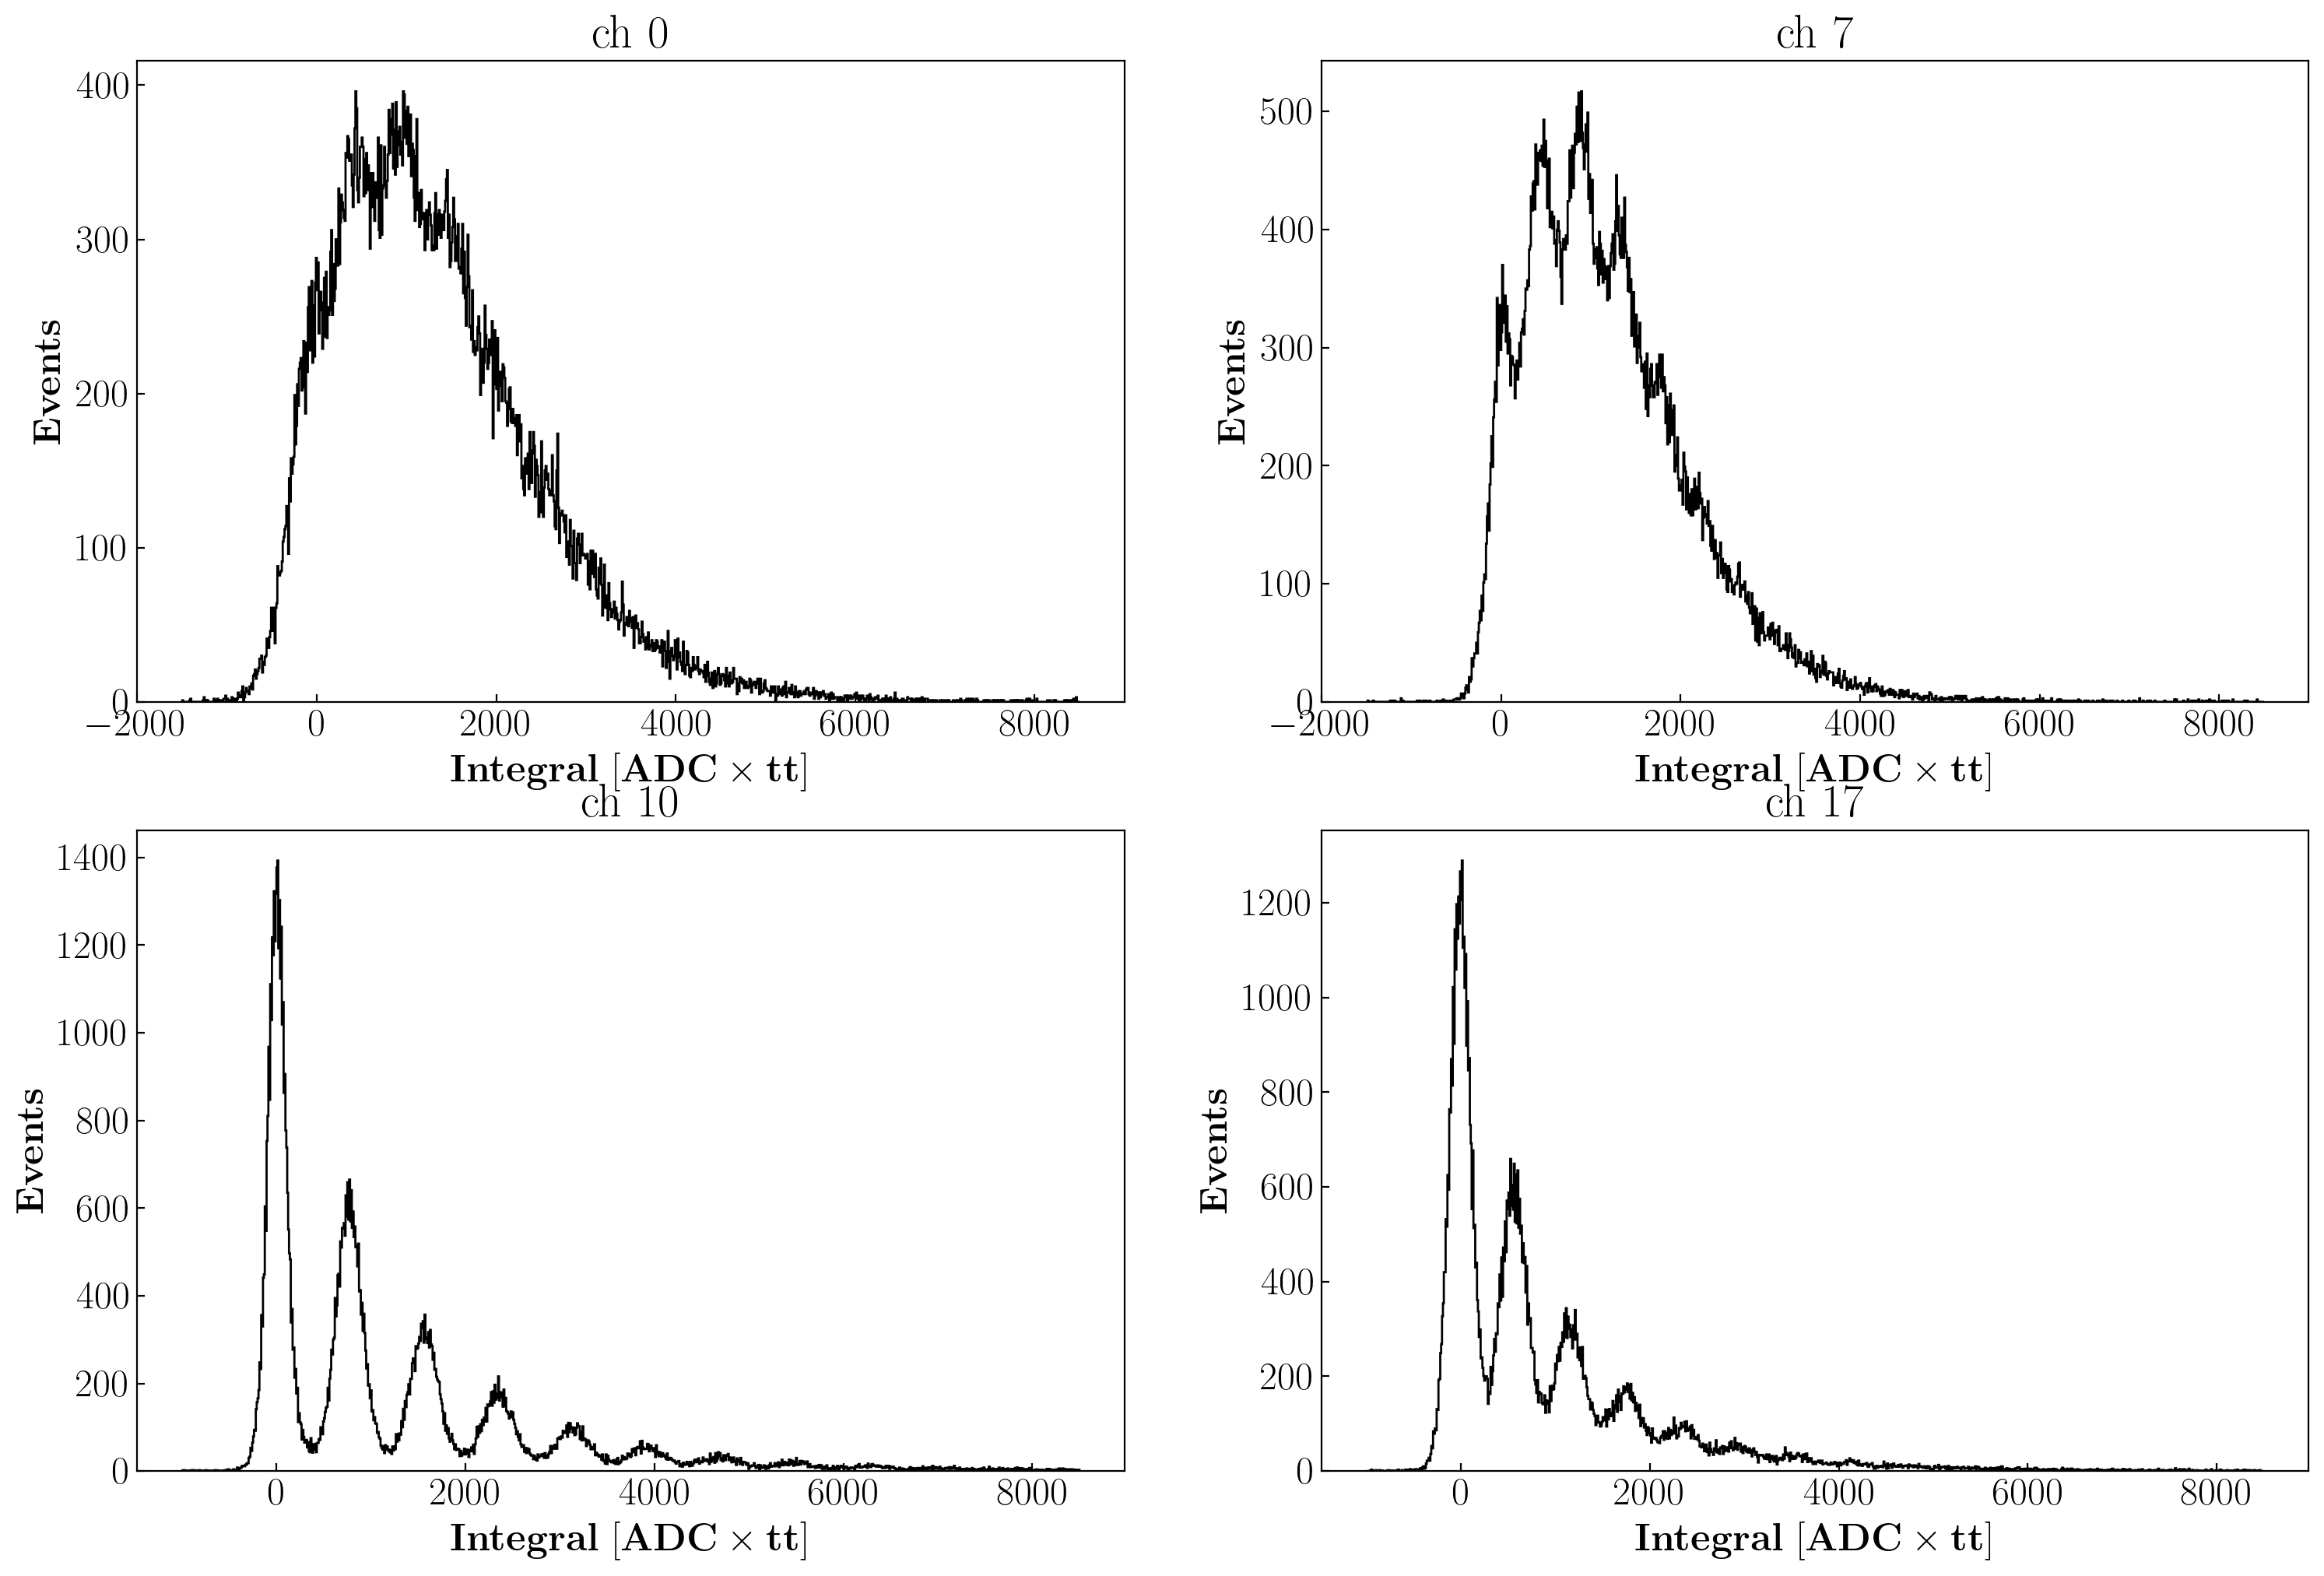

In [687]:
fig, axs = plt.subplots(2, 2, figsize=[18, 12], dpi=200)

h1 = axs[0,0].hist(np.sum(ch0[:, 175:225], axis=1), 1000, [-1.5e3, 8.5e3], histtype='step', color='k')
h2 = axs[0,1].hist(np.sum(ch7[:, 175:225], axis=1), 1000, [-1.5e3, 8.5e3], histtype='step', color='k')
h3 = axs[1,0].hist(np.sum(ch10[:, 175:230], axis=1), 1000, [-1.e3, 8.5e3], histtype='step', color='k')
h4 = axs[1,1].hist(np.sum(ch17[:, 175:230], axis=1), 1000, [-1.e3, 8.5e3], histtype='step', color='k')

axs[0,0].set_title(r"$\mathrm{ch\ 0}$")
axs[0,1].set_title(r"$\mathrm{ch\ 7}$")
axs[1,0].set_title(r"$\mathrm{ch\ 10}$")
axs[1,1].set_title(r"$\mathrm{ch\ 17}$")

for i in range(2):
    for j in range(2):
        axs[i,j].set_ylabel(r"$\mathrm{\bf Events}$")
        axs[i,j].set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
        

In [688]:
from iminuit.cost import LeastSquares
from iminuit import Minuit
import numba
from numba_stats import norm, lognorm

def gaus(x, mu, sig, N):
    return N/np.sqrt(2*np.pi) * np.exp(-(x-mu)**2 / sig**2)

def gsum(x, mu0, sig0, N0, mu1, sig1, N1, mu2, sig2, N2, mu3, sig3, N3,
        mu4, sig4, N4, mu5, sig5, N5, mu6, sig6, N6, mu7, sig7, N7,
        mu8, sig8, N8, mu9, sig9, N9):
        
    g0 = gaus(x, mu0, sig0, N0)
    g1 = gaus(x, mu1, sig1, N1)
    g2 = gaus(x, mu2, sig2, N2)
    g3 = gaus(x, mu3, sig3, N3)
    g4 = gaus(x, mu4, sig4, N4)
    g5 = gaus(x, mu5, sig5, N5)
    g6 = gaus(x, mu6, sig6, N6)
    g7 = gaus(x, mu7, sig7, N7)
    g8 = gaus(x, mu8, sig8, N8)
    g9 = gaus(x, mu9, sig9, N9)

    return g0 + g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9

def gsum10(x, mu0, sig0, N0, mu1, sig1, N1, mu2, sig2, N2, mu3, sig3, N3,
        mu4, sig4, N4, mu5, sig5, N5, mu6, sig6, N6, mu7, sig7, N7,
        mu8, sig8, N8, mu9, sig9, N9, mu10, sig10, N10):
        
    g0 = gaus(x, mu0, sig0, N0)
    g1 = gaus(x, mu1, sig1, N1)
    g2 = gaus(x, mu2, sig2, N2)
    g3 = gaus(x, mu3, sig3, N3)
    g4 = gaus(x, mu4, sig4, N4)
    g5 = gaus(x, mu5, sig5, N5)
    g6 = gaus(x, mu6, sig6, N6)
    g7 = gaus(x, mu7, sig7, N7)
    g8 = gaus(x, mu8, sig8, N8)
    g9 = gaus(x, mu9, sig9, N9)
    g10 = gaus(x, mu10, sig10, N10)

    return g0 + g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9 + g10


def gsum4(x, mu0, sig0, N0, mu1, sig1, N1, mu2, sig2, N2, mu3, sig3, N3):
    g0 = gaus(x, mu0, sig0, N0)
    g1 = gaus(x, mu1, sig1, N1)
    g2 = gaus(x, mu2, sig2, N2)
    g3 = gaus(x, mu3, sig3, N3)

    return g0 + g1 + g2 + g3

In [763]:
spevals["10"] = 765.9
speerrs["10"] = 1.0

In [689]:

a, b = h3[0], h3[1][:-1] + (h3[1][1] - h3[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 700 , sig1=30, N1=5e3,
              mu2 = 1700 , sig2=50, N2=0.5e3,
              mu3 = 2200 , sig3=50, N3=0.5e3,
              mu4 = 3000 , sig4=50, N4=0.5e3,
              mu5 = 3600 , sig5=100, N5=0.3e3,
              mu6 = 4400 , sig6=100, N6=0.02e3,
              mu7 = 5100 , sig7=150, N7=0.02e3,
              mu8 = 6000 , sig8=150, N8=0.02e3,
              mu9 = 7200 , sig9=150, N9=0.02e3)

msum.errordef = 1

msum.limits['sig0'] = [20, 300]
msum.limits['sig1'] = [20, 300]
msum.limits['sig2'] = [50, 350]
msum.limits['sig3'] = [50, 450]
msum.limits['sig4'] = [50, 450]
msum.limits['sig5'] = [50, 450]
msum.limits['sig6'] = [50, 450]
msum.limits['sig7'] = [50, 500]
msum.limits['sig8'] = [50, 400]
msum.limits['sig9'] = [50, 400]

msum.limits['N0'] = [100, 10e3]
msum.limits['N1'] = [100, 5e3]
msum.limits['N2'] = [100, 5e3]
msum.limits['N3'] = [100, 5e3]
msum.limits['N4'] = [100, 5e3]
msum.limits['N5'] = [100, 3e3]
msum.limits['N6'] = [10, 3e3]
msum.limits['N7'] = [10, 1e3]
msum.limits['N8'] = [10, 2e2]
msum.limits['N9'] = [10, 2e2]

msum.migrad()
msum.hesse()
msum.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2075 (χ²/ndof = 2.2)       │             Nfcn = 4946              │
│ EDM = 5.59e-10 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │    5.3    │    0.6    │            │            │         │         │       │
│ 1 │ sig0 │   147.4   │    0.7    │            │            │   20    │   300   │       │
│ 2 │ N0   │  3.086e3  │  0.022e3  │            │            │   100   │  10000  │       │
│ 3 │ mu1  │   765.9   │    1.0    │            │            │         │         │       │
│ 4 │ sig1 │   217.1   │    1.4    │            │            │   20    │   300   │       │
│ 5 │ N1   │  1.428e3  │  0.013e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2  │ 1.5601e3  │ 0.0016e3  │            │            │         │         │       │
│ 7 │ sig2 │   233.6   │    2.2    │            │            │   50    │   350   │       │
│ 8 │ N2   │    771    │     9     │            │            │   100   │  5000   │       │
│ 9 │ mu3  │ 2.3448e3  │ 0.0024e3  │            │            │         │         │       │
│ 10│ sig3 │    255    │     4     │            │            │   50    │   450   │       │
│ 11│ N3   │    424    │     7     │            │            │   100   │  5000   │       │
│ 12│ mu4  │  3.131e3  │  0.004e3  │            │            │         │         │       │
│ 13│ sig4 │    276    │     6     │            │            │   50    │   450   │       │
│ 14│ N4   │    235    │     5     │            │            │   100   │  5000   │       │
│ 15│ mu5  │  3.910e3  │  0.006e3  │            │            │         │         │       │
│ 16│ sig5 │    286    │    10     │            │            │   50    │   450   │       │
│ 17│ N5   │    132    │     4     │            │            │   100   │  3000   │       │
│ 18│ mu6  │  4.686e3  │  0.009e3  │            │            │         │         │       │
│ 19│ sig6 │    322    │    15     │            │            │   50    │   450   │       │
│ 20│ N6   │   75.2    │    2.5    │            │            │   10    │  3000   │       │
│ 21│ mu7  │  5.480e3  │  0.011e3  │            │            │         │         │       │
│ 22│ sig7 │    283    │    19     │            │            │   50    │   500   │       │
│ 23│ N7   │   46.2    │    2.1    │            │            │   10    │  1000   │       │
│ 24│ mu8  │  6.262e3  │  0.016e3  │            │            │         │         │       │
│ 25│ sig8 │    331    │    34     │            │            │   50    │   400   │       │
│ 26│ N8   │   26.8    │    1.7    │            │            │   10    │   200   │       │
│ 27│ mu9  │  7.15e3   │  0.04e3   │            │            │         │         │       │
│ 28│ sig9 │   400.0   │    2.2    │            │            │   50    │   400   │       │
│ 29│ N9   │   14.5    │    0.9    │            │            │   10    │   200   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

5.196794668330113


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 5.24$')

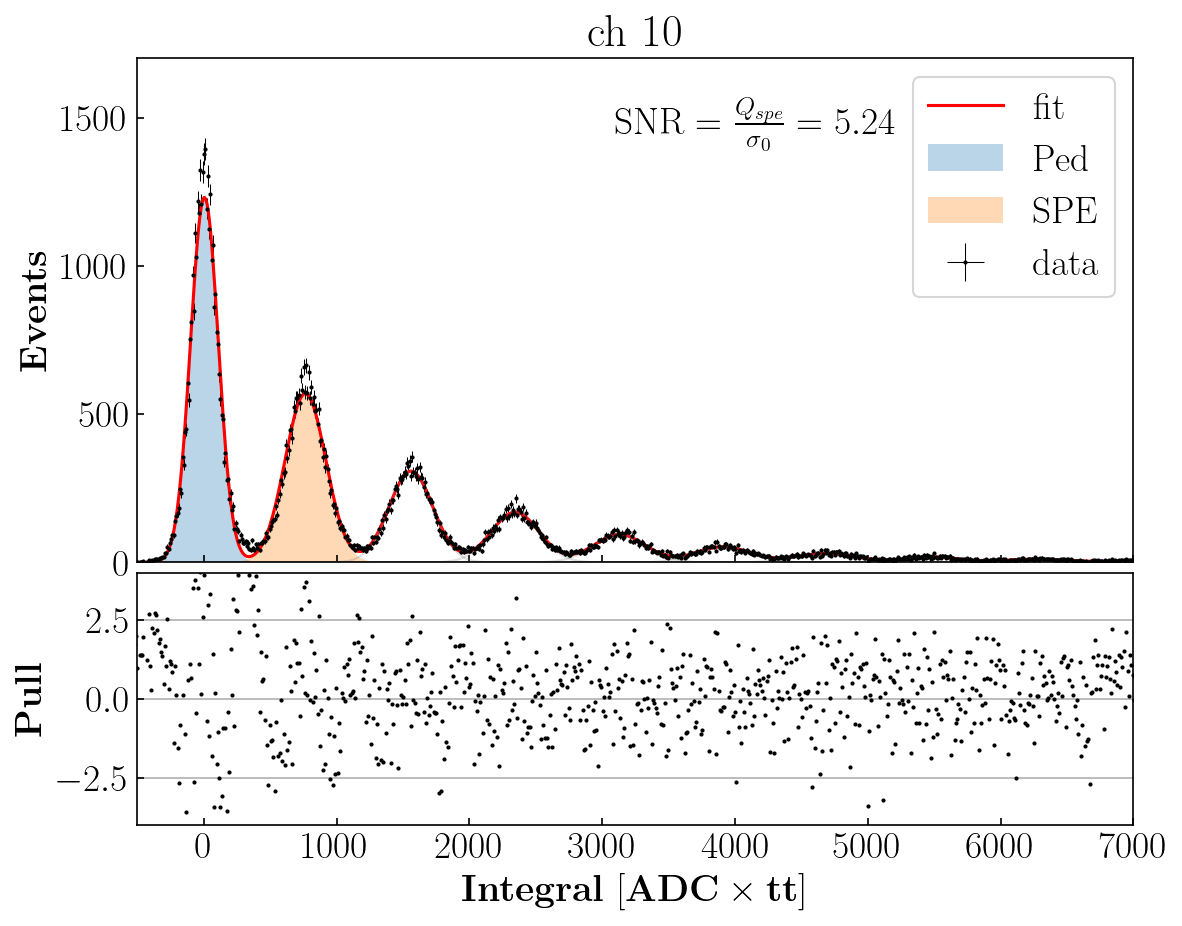

In [690]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 7e3)
ax1.set_ylim(0, 1700)
ax2.set_xlim(-0.5e3, 7e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 10}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum.values['mu0']
xspe = msum.values['mu1']
sig0 = msum.values['sig0']
print(xspe/sig0)

spevals["10"] = xspe
ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 5.24$', transform=ax1.transAxes)

In [691]:

a, b = h4[0], h4[1][:-1] + (h4[1][1] - h4[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum2 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 700 , sig1=30, N1=5e3,
              mu2 = 1100 , sig2=50, N2=0.5e3,
              mu3 = 1700 , sig3=50, N3=0.5e3,
              mu4 = 2300 , sig4=50, N4=0.5e3,
              mu5 = 2900 , sig5=100, N5=0.3e3,
              mu6 = 3800 , sig6=100, N6=0.02e3,
              mu7 = 5100 , sig7=150, N7=0.02e3,
              mu8 = 6000 , sig8=150, N8=0.02e3,
              mu9 = 7200 , sig9=150, N9=0.02e3)

msum2.errordef = 1

msum2.limits['sig0'] = [20, 300]
msum2.limits['sig1'] = [20, 300]
msum2.limits['sig2'] = [50, 350]
msum2.limits['sig3'] = [50, 450]
msum2.limits['sig4'] = [50, 450]
msum2.limits['sig5'] = [50, 450]
msum2.limits['sig6'] = [50, 450]
msum2.limits['sig7'] = [50, 500]
msum2.limits['sig8'] = [50, 400]
msum2.limits['sig9'] = [50, 400]

msum2.limits['N0'] = [100, 10e3]
msum2.limits['N1'] = [100, 5e3]
msum2.limits['N2'] = [100, 5e3]
msum2.limits['N3'] = [100, 5e3]
msum2.limits['N4'] = [100, 5e3]
msum2.limits['N5'] = [100, 3e3]
msum2.limits['N6'] = [10, 3e3]
msum2.limits['N7'] = [10, 1e3]
msum2.limits['N8'] = [10, 2e2]
msum2.limits['N9'] = [10, 2e2]

msum2.migrad()
msum2.hesse()
msum2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1452 (χ²/ndof = 1.6)       │             Nfcn = 4722              │
│ EDM = 1.92e-07 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │   -8.5    │    0.7    │            │            │         │         │       │
│ 1 │ sig0 │   165.5   │    0.8    │            │            │   20    │   300   │       │
│ 2 │ N0   │  2.919e3  │  0.020e3  │            │            │   100   │  10000  │       │
│ 3 │ mu1  │   553.8   │    1.4    │            │            │         │         │       │
│ 4 │ sig1 │   213.4   │    2.1    │            │            │   20    │   300   │       │
│ 5 │ N1   │  1.464e3  │  0.013e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2  │ 1.1497e3  │ 0.0025e3  │            │            │         │         │       │
│ 7 │ sig2 │    233    │     4     │            │            │   50    │   350   │       │
│ 8 │ N2   │    760    │    10     │            │            │   100   │  5000   │       │
│ 9 │ mu3  │  1.739e3  │  0.004e3  │            │            │         │         │       │
│ 10│ sig3 │    257    │     9     │            │            │   50    │   450   │       │
│ 11│ N3   │    410    │     7     │            │            │   100   │  5000   │       │
│ 12│ mu4  │  2.335e3  │  0.007e3  │            │            │         │         │       │
│ 13│ sig4 │    271    │    16     │            │            │   50    │   450   │       │
│ 14│ N4   │    228    │     5     │            │            │   100   │  5000   │       │
│ 15│ mu5  │  2.894e3  │  0.012e3  │            │            │         │         │       │
│ 16│ sig5 │    248    │    17     │            │            │   50    │   450   │       │
│ 17│ N5   │    115    │     4     │            │            │   100   │  3000   │       │
│ 18│ mu6  │  3.485e3  │  0.024e3  │            │            │         │         │       │
│ 19│ sig6 │    450    │    17     │            │            │   50    │   450   │       │
│ 20│ N6   │   69.0    │    2.3    │            │            │   10    │  3000   │       │
│ 21│ mu7  │  4.37e3   │  0.04e3   │            │            │         │         │       │
│ 22│ sig7 │    500    │     7     │            │            │   50    │   500   │       │
│ 23│ N7   │   29.8    │    1.4    │            │            │   10    │  1000   │       │
│ 24│ mu8  │  5.26e3   │  0.04e3   │            │            │         │         │       │
│ 25│ sig8 │    400    │    15     │            │            │   50    │   400   │       │
│ 26│ N8   │   12.9    │    1.0    │            │            │   10    │   200   │       │
│ 27│ mu9  │  6.06e3   │  0.04e3   │            │            │         │         │       │
│ 28│ sig9 │    400    │     5     │            │            │   50    │   400   │       │
│ 29│ N9   │   10.00   │   0.12    │            │            │   10    │   200   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [764]:
spevals["17"] = 553.8
speerrs["17"] = 1.4

3.347145440191438


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 3.35$')

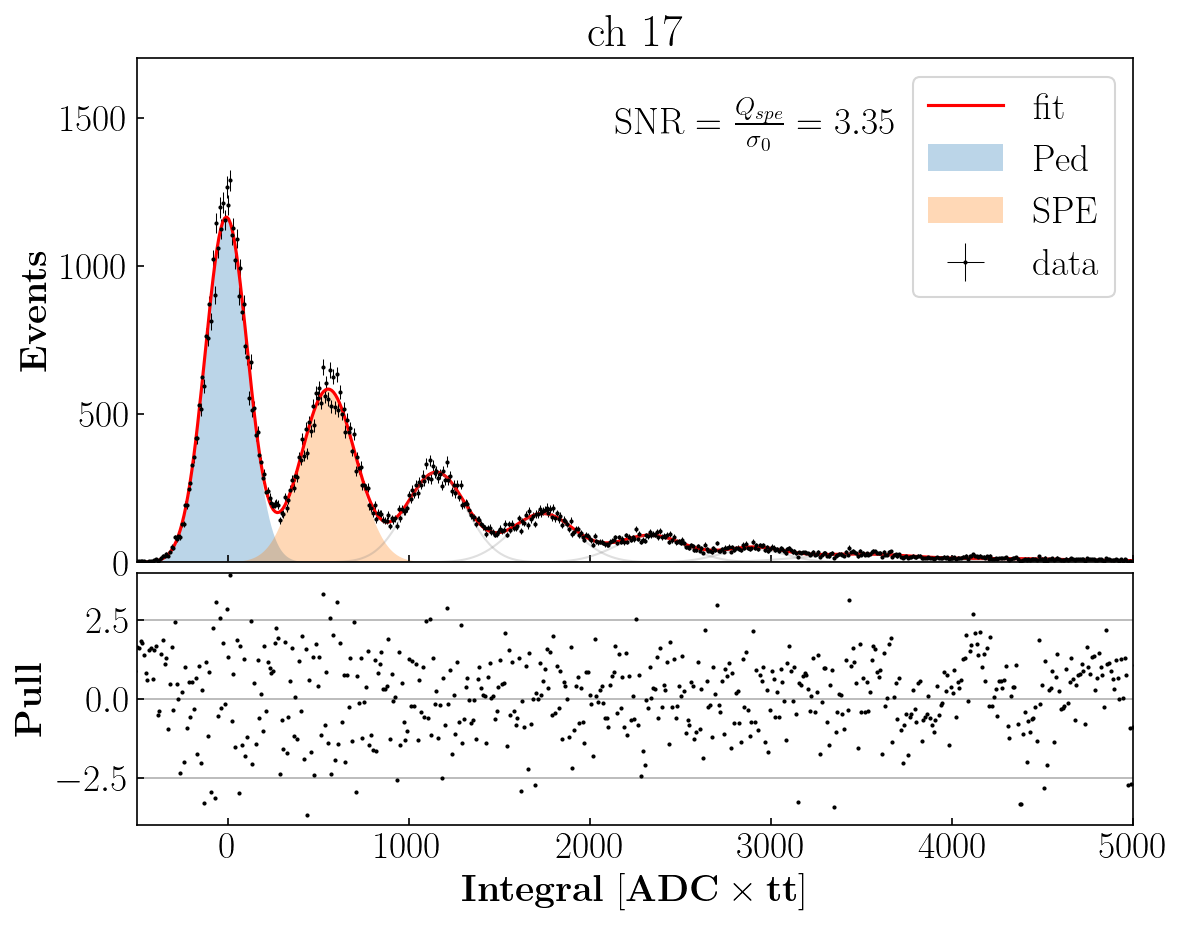

In [692]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum2.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum2.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 1700)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum2.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum2.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum2.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 17}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum2.values['mu0']
xspe = msum2.values['mu1']
sig0 = msum2.values['sig0']
print(xspe/sig0)

spevals["17"] = 553.8

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 3.35$', transform=ax1.transAxes)

In [693]:

a, b = h2[0], h2[1][:-1] + (h2[1][1] - h2[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum3 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 500 , sig1=130, N1=5e3,
              mu2 = 1000 , sig2=150, N2=0.5e3,
              mu3 = 1400 , sig3=150, N3=0.5e3,
              mu4 = 1800 , sig4=150, N4=0.5e3,
              mu5 = 2200 , sig5=100, N5=0.3e3,
              mu6 = 2800 , sig6=100, N6=0.02e3,
              mu7 = 3000 , sig7=150, N7=0.02e3,
              mu8 = 6000 , sig8=150, N8=0.02e3,
              mu9 = 7200 , sig9=150, N9=0.02e3)

msum3.errordef = 1

msum3.limits['mu0'] = [-200, 200]
msum3.limits['mu1'] = [200, 600]
msum3.limits['mu2'] = [700, 1200]
msum3.limits['mu3'] = [1200, 1600]
msum3.limits['mu4'] = [1700, 2000]
msum3.limits['mu5'] = [2500, 2900]
msum3.limits['mu6'] = [2800, 3100]

msum3.limits['mu7'] = [3500, 10000]
msum3.limits['mu8'] = [3500, 10000]
msum3.limits['mu9'] = [3500, 10000]


msum3.limits['sig0'] = [120, 300]
msum3.limits['sig1'] = [120, 300]
msum3.limits['sig2'] = [150, 350]
msum3.limits['sig3'] = [150, 450]
msum3.limits['sig4'] = [150, 450]
msum3.limits['sig5'] = [150, 450]
msum3.limits['sig6'] = [150, 450]
msum3.limits['sig7'] = [150, 500]
msum3.limits['sig8'] = [150, 400]
msum3.limits['sig9'] = [150, 400]

msum3.limits['N0'] = [100, 10e3]
msum3.limits['N1'] = [100, 5e3]
msum3.limits['N2'] = [100, 5e3]
msum3.limits['N3'] = [100, 5e3]
msum3.limits['N4'] = [100, 5e3]
msum3.limits['N5'] = [100, 3e3]
msum3.limits['N6'] = [10, 3e3]
msum3.limits['N7'] = [10, 1e3]
msum3.limits['N8'] = [10, 2e2]
msum3.limits['N9'] = [10, 2e2]

msum3.migrad()
msum3.hesse()
msum3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 967.6 (χ²/ndof = 1.4)      │             Nfcn = 14414             │
│ EDM = 4.52e-05 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │    22     │     6     │            │            │  -200   │   200   │       │
│ 1 │ sig0 │    215    │     5     │            │            │   120   │   300   │       │
│ 2 │ N0   │    755    │    16     │            │            │   100   │  10000  │       │
│ 3 │ mu1  │    440    │     7     │            │            │   200   │   600   │       │
│ 4 │ sig1 │    221    │    12     │            │            │   120   │   300   │       │
│ 5 │ N1   │  1.134e3  │  0.023e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2  │    862    │     9     │            │            │   700   │  1200   │       │
│ 7 │ sig2 │    226    │    18     │            │            │   150   │   350   │       │
│ 8 │ N2   │  1.13e3   │  0.05e3   │            │            │   100   │  5000   │       │
│ 9 │ mu3  │  1.283e3  │  0.017e3  │            │            │  1200   │  1600   │       │
│ 10│ sig3 │    268    │    25     │            │            │   150   │   450   │       │
│ 11│ N3   │    780    │    40     │            │            │   100   │  5000   │       │
│ 12│ mu4  │  1.794e3  │  0.014e3  │            │            │  1700   │  2000   │       │
│ 13│ sig4 │   450.0   │    2.4    │            │            │   150   │   450   │       │
│ 14│ N4   │    608    │    19     │            │            │   100   │  5000   │       │
│ 15│ mu5  │ 2.5000e3  │ 0.0018e3  │            │            │  2500   │  2900   │       │
│ 16│ sig5 │    363    │    11     │            │            │   150   │   450   │       │
│ 17│ N5   │    222    │     6     │            │            │   100   │  3000   │       │
│ 18│ mu6  │ 3.1000e3  │ 0.0022e3  │            │            │  2800   │  3100   │       │
│ 19│ sig6 │   450.0   │    2.2    │            │            │   150   │   450   │       │
│ 20│ N6   │    113    │     4     │            │            │   10    │  3000   │       │
│ 21│ mu7  │  3.990e3  │  0.022e3  │            │            │  3500   │  10000  │       │
│ 22│ sig7 │   500.0   │    1.7    │            │            │   150   │   500   │       │
│ 23│ N7   │   33.1    │    1.3    │            │            │   10    │  1000   │       │
│ 24│ mu8  │  6.184e3  │  0.018e3  │            │            │  3500   │  10000  │       │
│ 25│ sig8 │    150    │     6     │            │            │   150   │   400   │       │
│ 26│ N8   │   10.00   │   0.09    │            │            │   10    │   200   │       │
│ 27│ mu9  │  7.48e3   │  0.04e3   │            │            │  3500   │  10000  │       │
│ 28│ sig9 │    220    │    60     │            │            │   150   │   400   │       │
│ 29│ N9   │   10.00   │   0.23    │            │            │   10    │   200   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [765]:
spevals["7"] = 440
speerrs["7"] = 7.0

2.0492766741547617


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 2.05$')

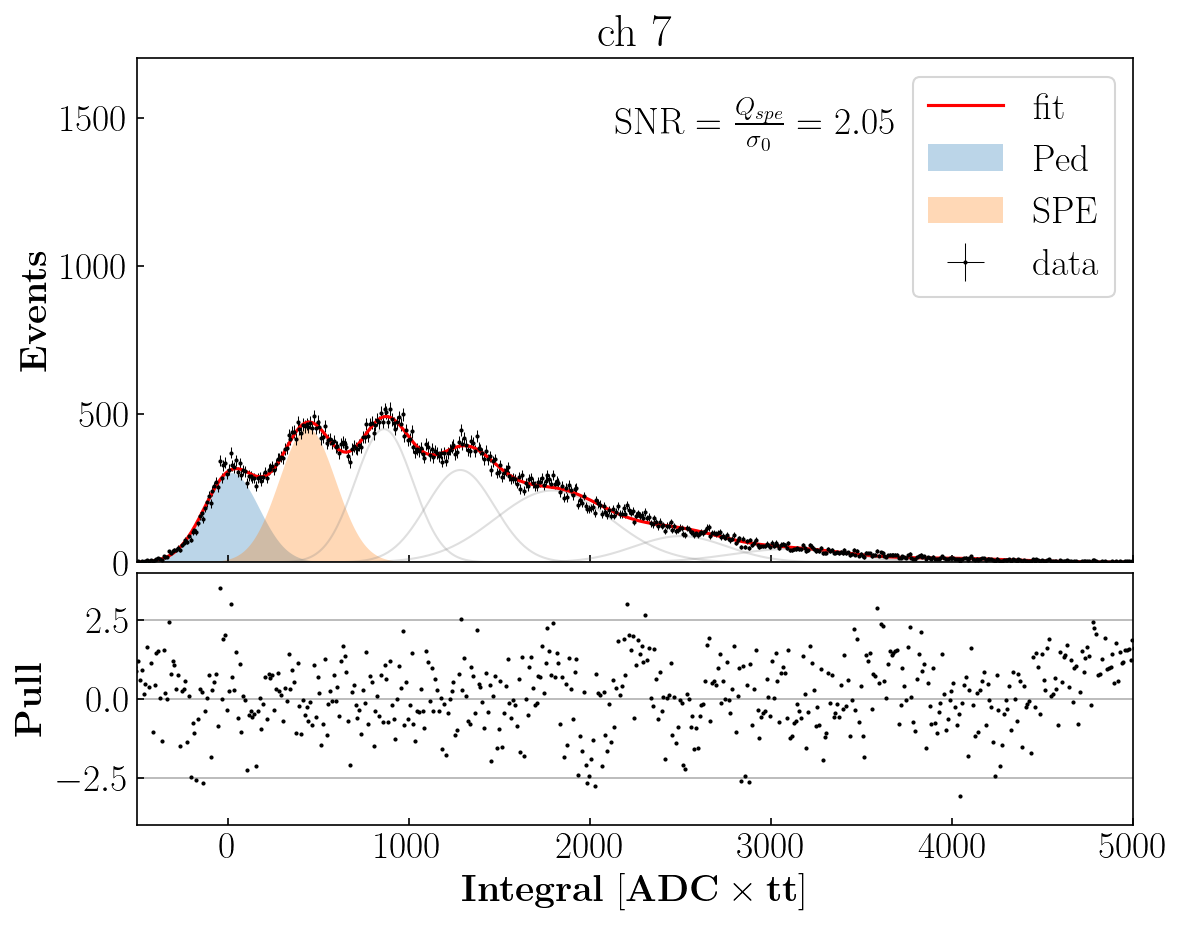

In [694]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum3.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum3.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 1700)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum3.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum3.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum3.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 7}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum3.values['mu0']
xspe = msum3.values['mu1']
sig0 = msum3.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 2.05$', transform=ax1.transAxes)

In [695]:

a, b = h1[0], h1[1][:-1] + (h1[1][1] - h1[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum4 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 500 , sig1=130, N1=5e3,
              mu2 = 1000 , sig2=150, N2=0.5e3,
              mu3 = 1400 , sig3=150, N3=0.5e3,
              mu4 = 1800 , sig4=150, N4=0.5e3,
              mu5 = 2200 , sig5=100, N5=0.3e3,
              mu6 = 2800 , sig6=100, N6=0.02e3,
              mu7 = 3000 , sig7=150, N7=0.02e3,
              mu8 = 6000 , sig8=150, N8=0.02e3,
              mu9 = 7200 , sig9=150, N9=0.02e3)

msum4.errordef = 1

msum4.limits['mu0'] = [-200, 200]
msum4.limits['mu1'] = [200, 600]
msum4.limits['mu2'] = [700, 1200]
msum4.limits['mu3'] = [1200, 1600]
msum4.limits['mu4'] = [1700, 2000]
msum4.limits['mu5'] = [2500, 2900]
msum4.limits['mu6'] = [2800, 3100]

msum4.limits['mu7'] = [3500, 10000]
msum4.limits['mu8'] = [3500, 10000]
msum4.limits['mu9'] = [3500, 10000]


msum4.limits['sig0'] = [120, 300]
msum4.limits['sig1'] = [120, 300]
msum4.limits['sig2'] = [150, 350]
msum4.limits['sig3'] = [150, 450]
msum4.limits['sig4'] = [150, 450]
msum4.limits['sig5'] = [150, 450]
msum4.limits['sig6'] = [150, 450]
msum4.limits['sig7'] = [150, 500]
msum4.limits['sig8'] = [150, 400]
msum4.limits['sig9'] = [150, 400]

msum4.limits['N0'] = [100, 10e3]
msum4.limits['N1'] = [100, 5e3]
msum4.limits['N2'] = [100, 5e3]
msum4.limits['N3'] = [100, 5e3]
msum4.limits['N4'] = [100, 5e3]
msum4.limits['N5'] = [100, 3e3]
msum4.limits['N6'] = [10, 3e3]
msum4.limits['N7'] = [10, 1e3]
msum4.limits['N8'] = [10, 2e2]
msum4.limits['N9'] = [10, 2e2]

msum4.migrad()
msum4.hesse()
msum4.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1440 (χ²/ndof = 1.7)       │             Nfcn = 14987             │
│ EDM = 0.000183 (Goal: 0.0002)    │            time = 1.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │   -130    │     5     │            │            │  -200   │   200   │       │
│ 1 │ sig0 │  300.00   │   0.29    │            │            │   120   │   300   │       │
│ 2 │ N0   │    515    │    10     │            │            │   100   │  10000  │       │
│ 3 │ mu1  │    371    │     7     │            │            │   200   │   600   │       │
│ 4 │ sig1 │   300.0   │    1.2    │            │            │   120   │   300   │       │
│ 5 │ N1   │    775    │    13     │            │            │   100   │  5000   │       │
│ 6 │ mu2  │    917    │    12     │            │            │   700   │  1200   │       │
│ 7 │ sig2 │    350    │     6     │            │            │   150   │   350   │       │
│ 8 │ N2   │    870    │    17     │            │            │   100   │  5000   │       │
│ 9 │ mu3  │  1.487e3  │  0.010e3  │            │            │  1200   │  1600   │       │
│ 10│ sig3 │    336    │    14     │            │            │   150   │   450   │       │
│ 11│ N3   │    690    │    13     │            │            │   100   │  5000   │       │
│ 12│ mu4  │  2.000e3  │  0.017e3  │            │            │  1700   │  2000   │       │
│ 13│ sig4 │    311    │    15     │            │            │   150   │   450   │       │
│ 14│ N4   │    425    │    22     │            │            │   100   │  5000   │       │
│ 15│ mu5  │   2.5e3   │   0.4e3   │            │            │  2500   │  2900   │       │
│ 16│ sig5 │    372    │    16     │            │            │   150   │   450   │       │
│ 17│ N5   │    299    │    11     │            │            │   100   │  3000   │       │
│ 18│ mu6  │  3.100e3  │  0.004e3  │            │            │  2800   │  3100   │       │
│ 19│ sig6 │   450.0   │    2.6    │            │            │   150   │   450   │       │
│ 20│ N6   │    177    │     6     │            │            │   10    │  3000   │       │
│ 21│ mu7  │  3.944e3  │  0.023e3  │            │            │  3500   │  10000  │       │
│ 22│ sig7 │   500.0   │    2.1    │            │            │   150   │   500   │       │
│ 23│ N7   │   73.7    │    2.0    │            │            │   10    │  1000   │       │
│ 24│ mu8  │  4.92e3   │  0.05e3   │            │            │  3500   │  10000  │       │
│ 25│ sig8 │   400.0   │    1.3    │            │            │   150   │   400   │       │
│ 26│ N8   │   23.2    │    1.6    │            │            │   10    │   200   │       │
│ 27│ mu9  │  7.401e3  │  0.024e3  │            │            │  3500   │  10000  │       │
│ 28│ sig9 │    150    │     4     │            │            │   150   │   400   │       │
│ 29│ N9   │   10.00   │   0.06    │            │            │   10    │   200   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [766]:
spevals["0"] = 371
speerrs["0"] = 7

1.2373519612695663


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 1.24$')

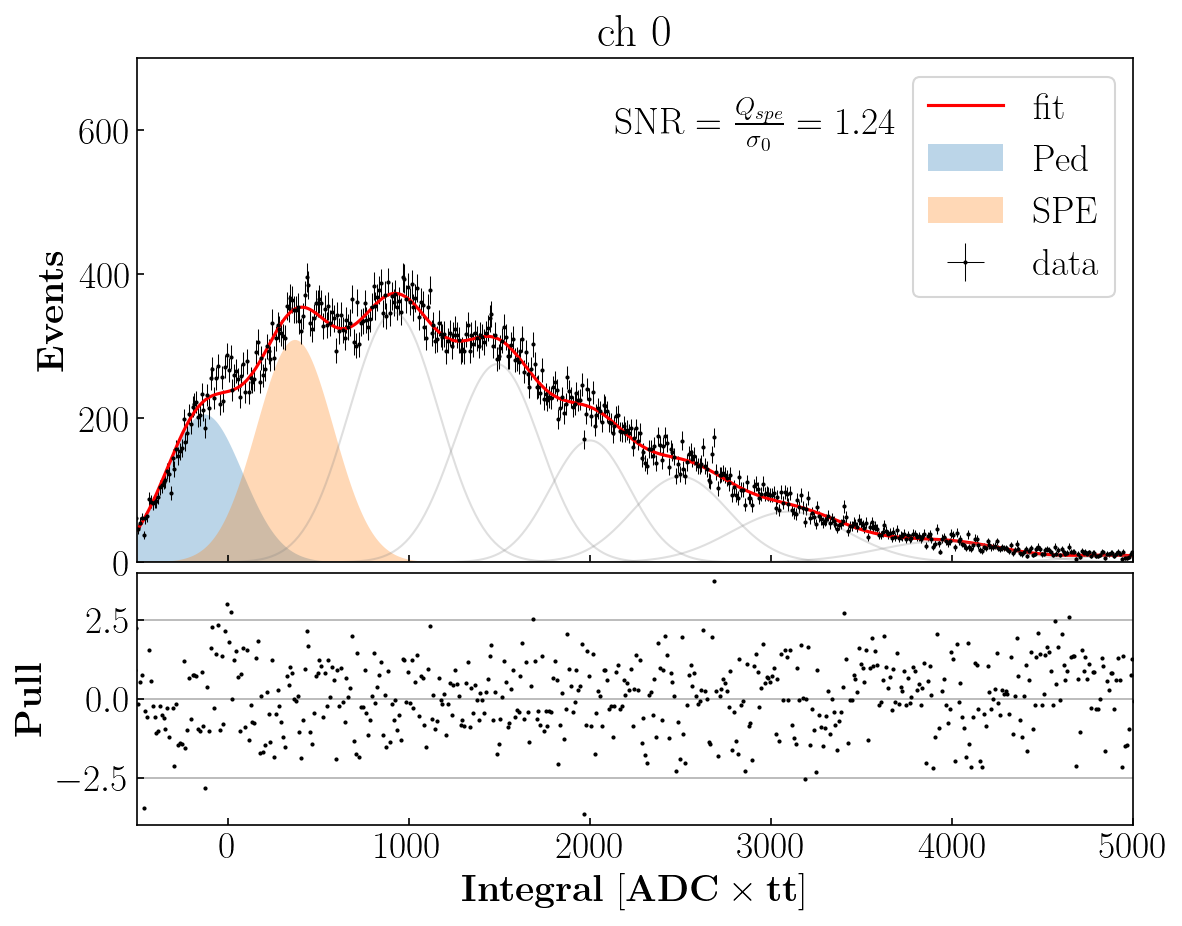

In [696]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum4.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum4.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 700)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum4.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum4.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum4.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 0}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum4.values['mu0']
xspe = msum4.values['mu1']
sig0 = msum4.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 1.24$', transform=ax1.transAxes)

Text(0, 0.5, '$\\mathrm{\\bf Integral, [ADC \\times tt]}$')

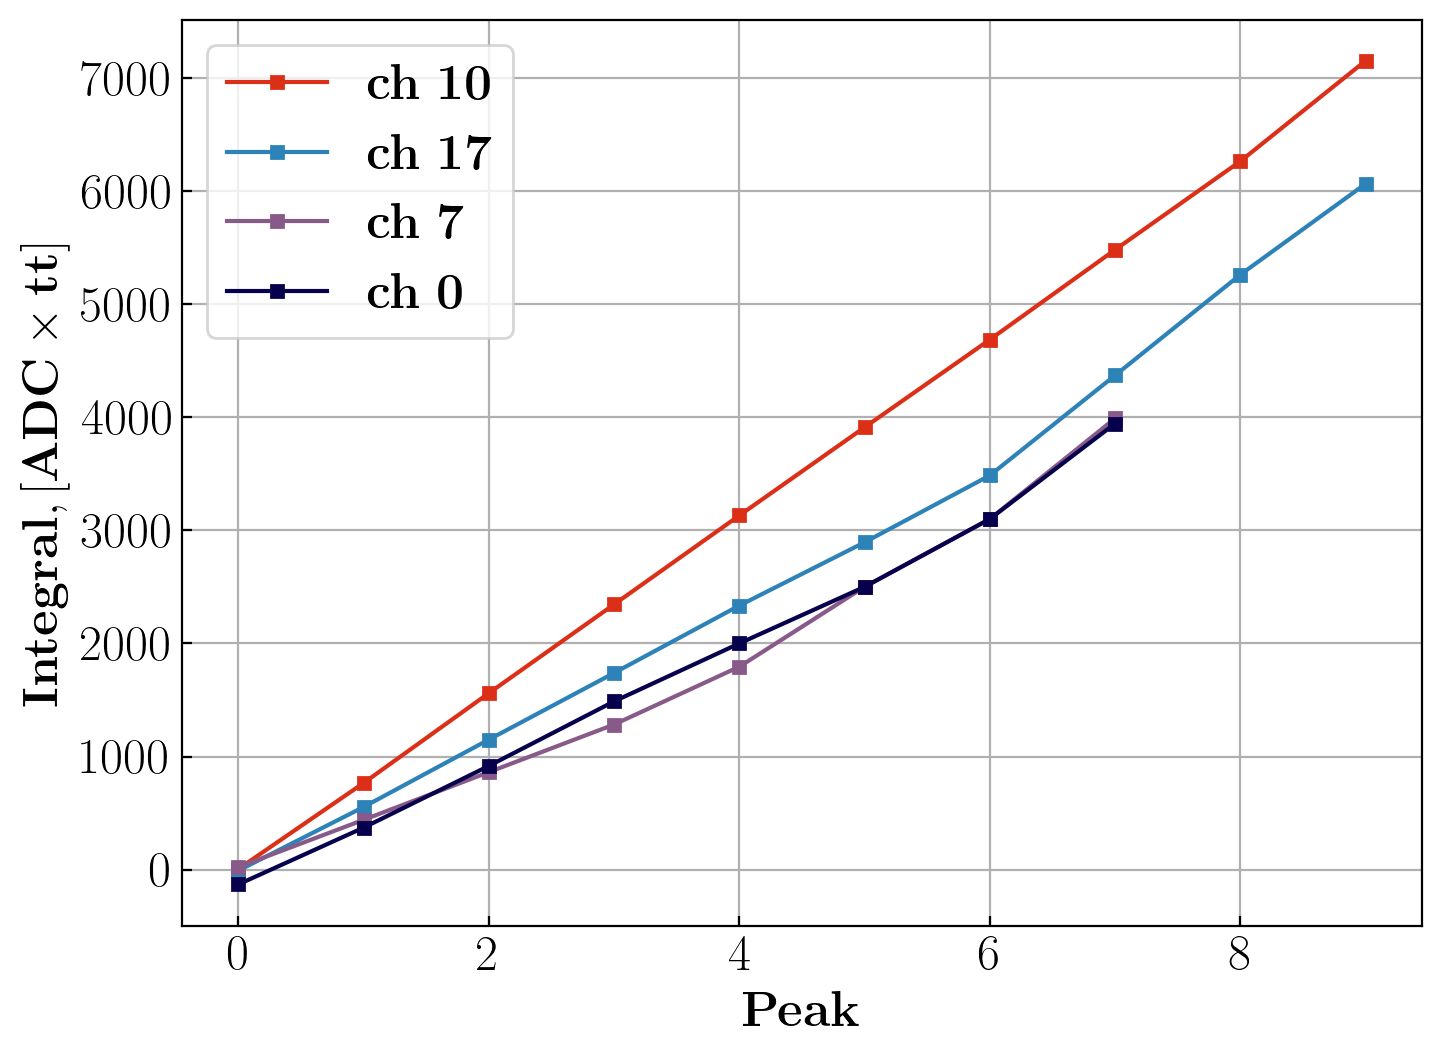

In [697]:
fig, ax = plt.subplots(figsize=[8,6], dpi=200)

pks = np.arange(10)
pks1 = np.arange(8)

ax.plot(pks, msum.values[0::3], color=c1, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 10}$')
ax.plot(pks, msum2.values[0::3], color=c2, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 17}$')

ax.plot(pks1, msum3.values[0::3][:8], color=c3, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 7}$')
ax.plot(pks1, msum4.values[0::3][:8], color=c4, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 0}$')

ax.grid(axis='both')
ax.legend(loc='best')

ax.set_xlabel(r"$\mathrm{\bf Peak}$")
ax.set_ylabel(r"$\mathrm{\bf Integral, [ADC \times tt]}$")

Text(0, 0.5, '$\\mathrm{\\bf Peak width}$')

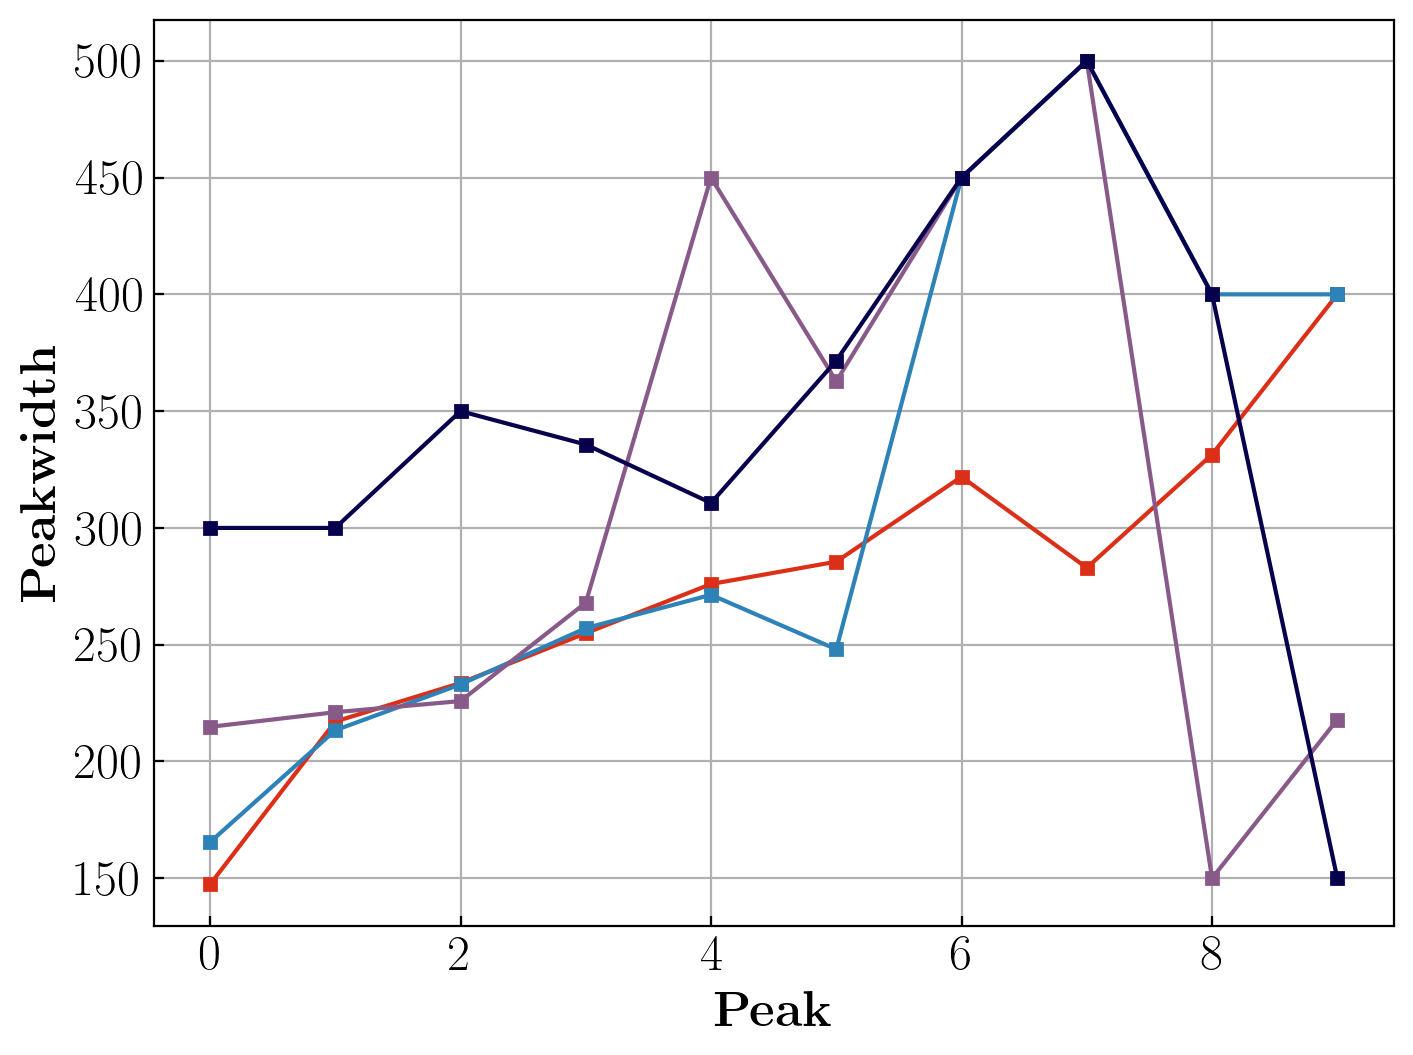

In [698]:
fig, ax = plt.subplots(figsize=[8,6], dpi=200)

pks = np.arange(10)

ax.plot(pks, msum.values[1::3], color=c1, marker='s', ms=4)
ax.plot(pks, msum2.values[1::3], color=c2, marker='s', ms=4)
ax.plot(pks, msum3.values[1::3], color=c3, marker='s', ms=4)
ax.plot(pks, msum4.values[1::3], color=c4, marker='s', ms=4)

ax.grid(axis='both')

ax.set_xlabel(r"$\mathrm{\bf Peak}$")
ax.set_ylabel(r"$\mathrm{\bf Peak width}$")

In [573]:
src = 3
ch = 20

dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24100/"
runNo = 24100

filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch20 = np.concatenate([dat0, dat1])
del dat0, dat1

src = 3
ch = 27
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch27 = np.concatenate([dat0, dat1])
del dat0, dat1


dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24100/"
runNo = 24100
src = 4
ch = 30
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch30 = np.concatenate([dat0, dat1])
del dat0, dat1


src = 4
ch = 37
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch37 = np.concatenate([dat0, dat1])

del dat0, dat1

In [574]:
evts = ch20.shape[0]
ch20 = ch20.reshape(evts*16, int(ch20.shape[1]/16))
ch27 = ch27.reshape(evts*16, int(ch27.shape[1]/16))
evts = ch30.shape[0]
ch30 = ch30.reshape(evts*16, int(ch30.shape[1]/16))
ch37 = ch37.reshape(evts*16, int(ch37.shape[1]/16))

In [575]:
ch20 = ch20[:, 2350:2800]
ch27 = ch27[:, 2350:2800]
ch30 = ch30[:, 2350:2800]
ch37 = ch37[:, 2350:2800]

In [576]:
peds = np.array([np.argmax(np.bincount(ch20[i])) for i in range(len(ch20))])
peds = peds[:, np.newaxis]
ch20 = ch20 - peds

peds = np.array([np.argmax(np.bincount(ch27[i])) for i in range(len(ch27))])
peds = peds[:, np.newaxis]
ch27 = ch27 - peds

peds = np.array([np.argmax(np.bincount(ch30[i])) for i in range(len(ch30))])
peds = peds[:, np.newaxis]
ch30 = ch30 - peds

peds = np.array([np.argmax(np.bincount(ch37[i])) for i in range(len(ch37))])
peds = peds[:, np.newaxis]
ch37 = ch37 - peds

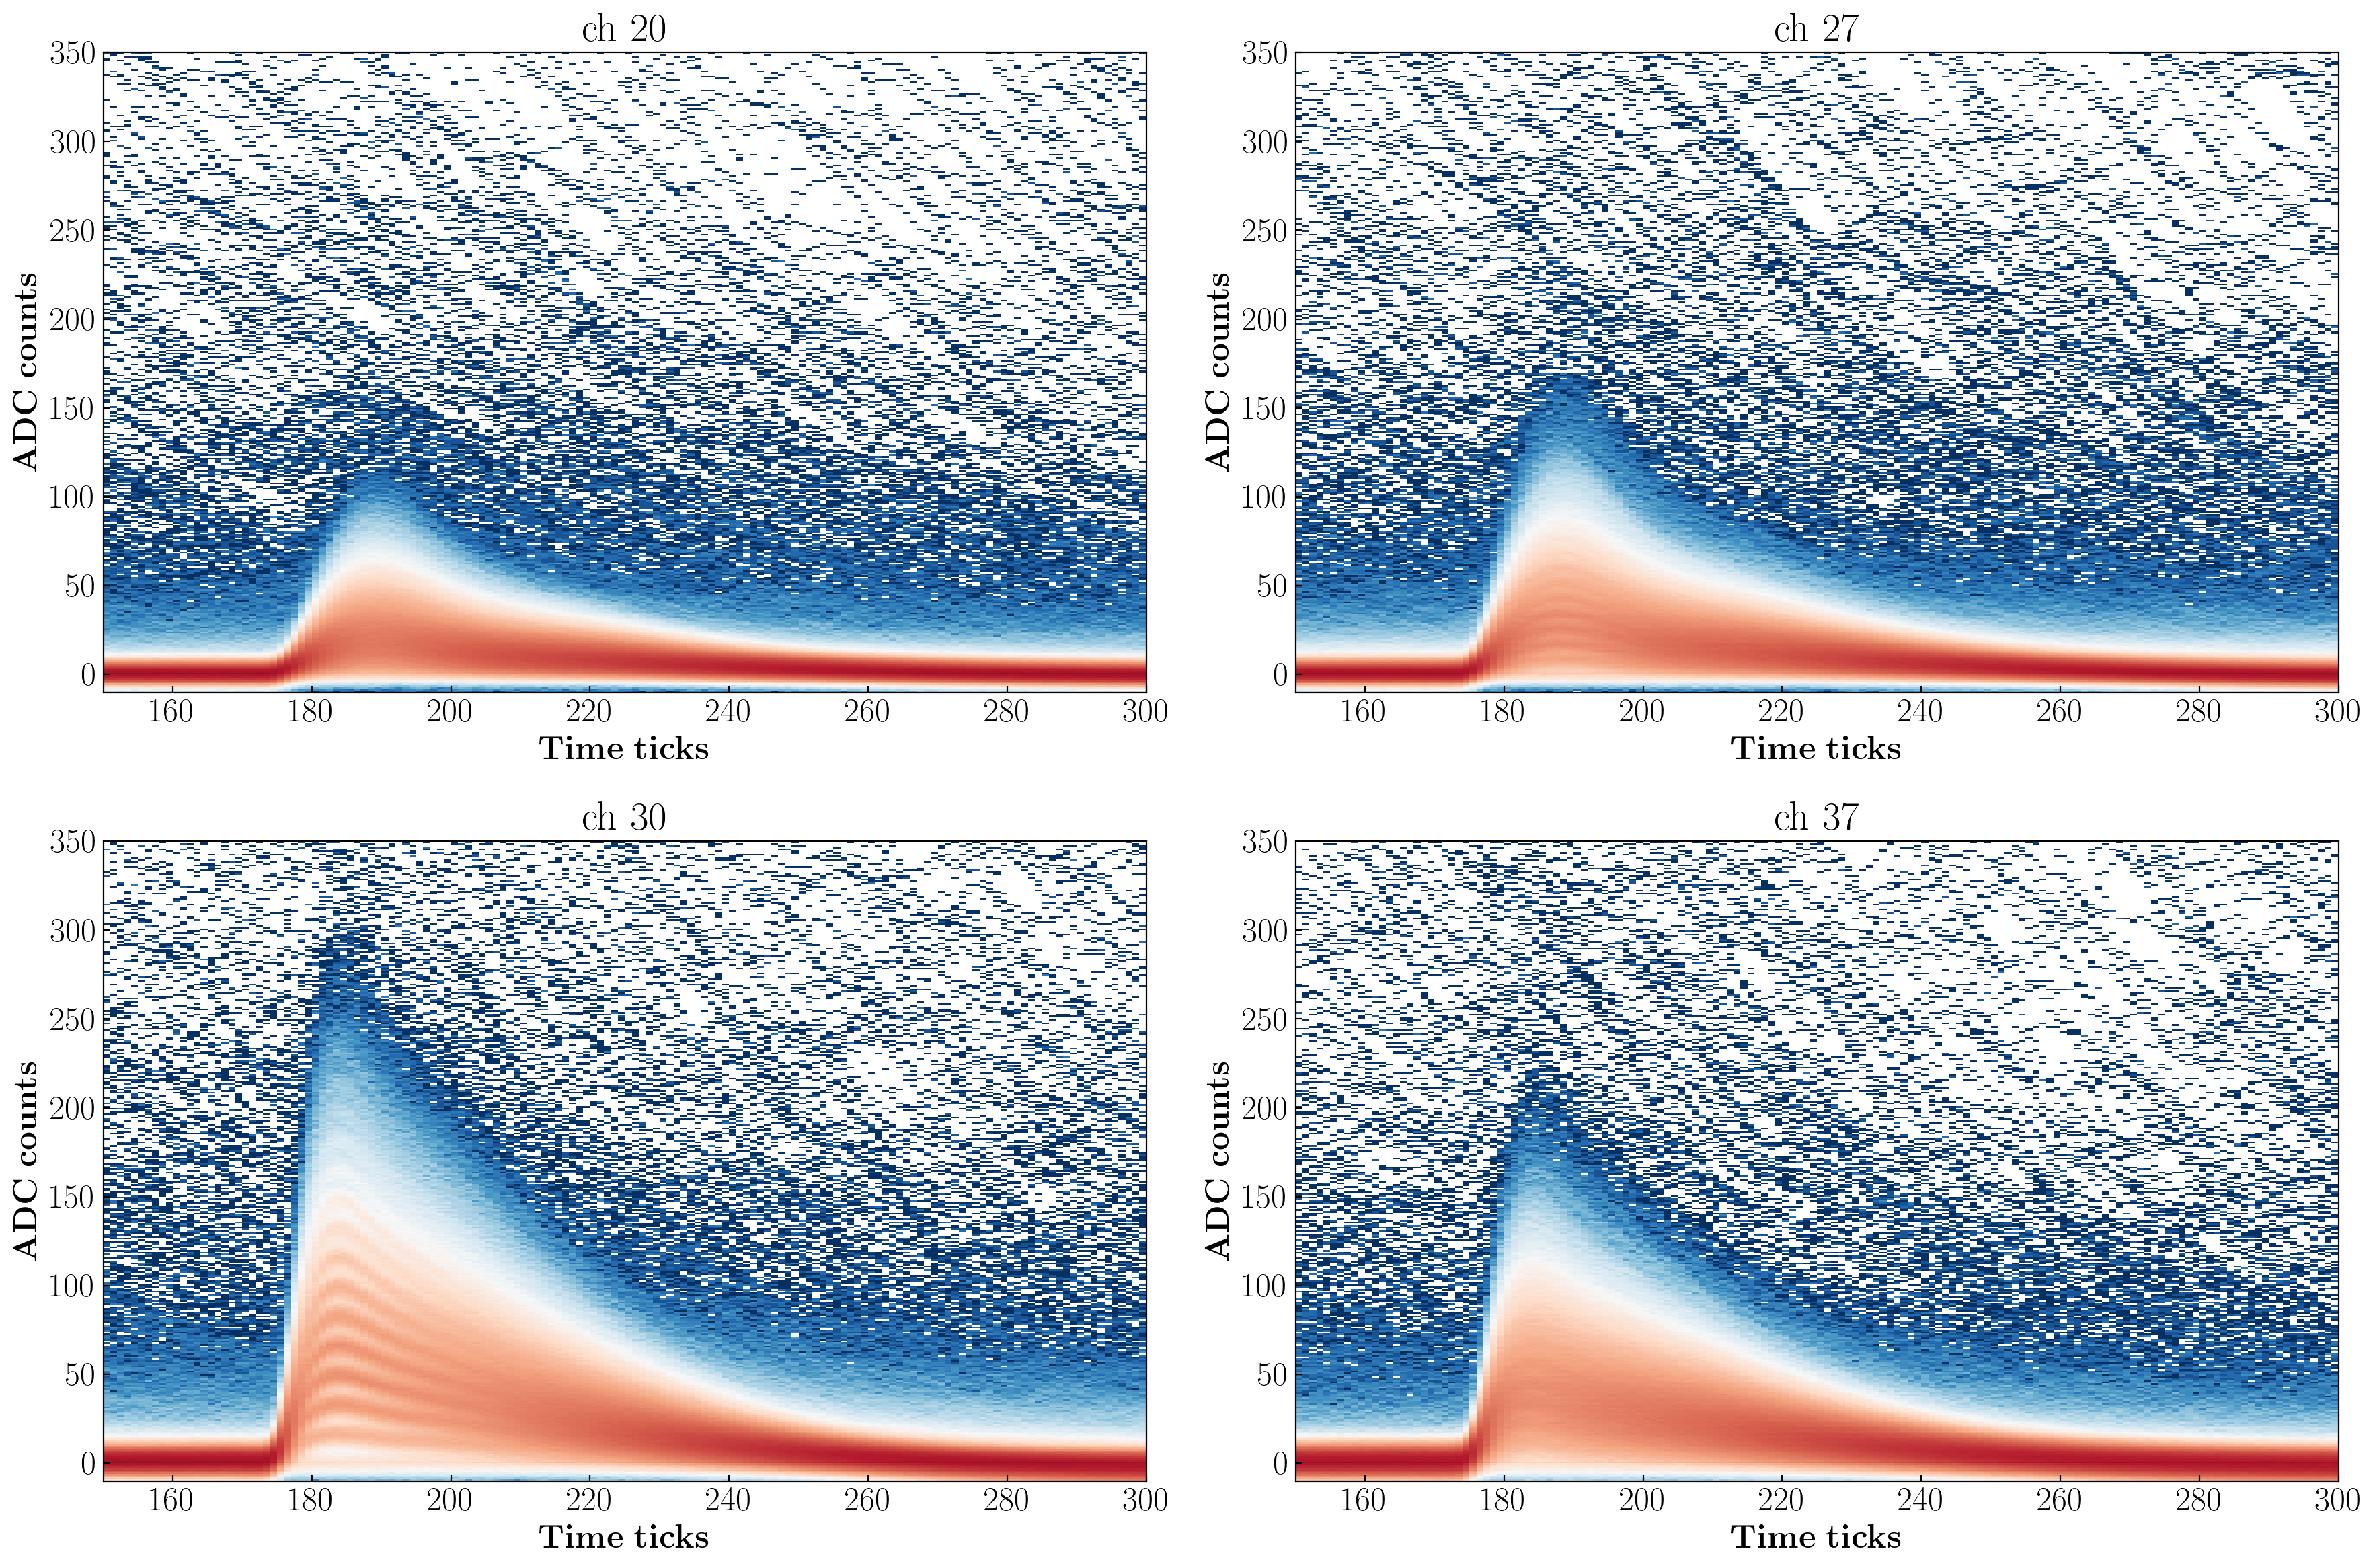

In [577]:
fig, axs = plt.subplots(2, 2, figsize=[18, 12], dpi=200)

xxs3 = np.ones(ch20.shape) + np.arange(ch20.shape[1])
axs[0,0].hist2d(xxs3.flatten(), ch20.flatten(), [ch20.shape[1], 360], [[0, ch20.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
axs[0,1].hist2d(xxs3.flatten(), ch27.flatten(), [ch27.shape[1], 360], [[0, ch27.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
xxs3 = np.ones(ch30.shape) + np.arange(ch30.shape[1])
axs[1,0].hist2d(xxs3.flatten(), ch30.flatten(), [ch30.shape[1], 360], [[0, ch30.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
axs[1,1].hist2d(xxs3.flatten(), ch37.flatten(), [ch37.shape[1], 360], [[0, ch37.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')


for i in range(2):
    for j in range(2):
        axs[i,j].set_ylim(-10, 350)
        axs[i,j].set_xlim(150, 300)

        axs[i,j].set_ylabel(r"$\mathrm{\bf ADC\ counts}$")
        axs[i,j].set_xlabel(r"$\mathrm{\bf Time\ ticks}$")

axs[0,0].set_title(r"$\mathrm{ch\ 20}$")
axs[0,1].set_title(r"$\mathrm{ch\ 27}$")
axs[1,0].set_title(r"$\mathrm{ch\ 30}$")
axs[1,1].set_title(r"$\mathrm{ch\ 37}$")

plt.tight_layout()

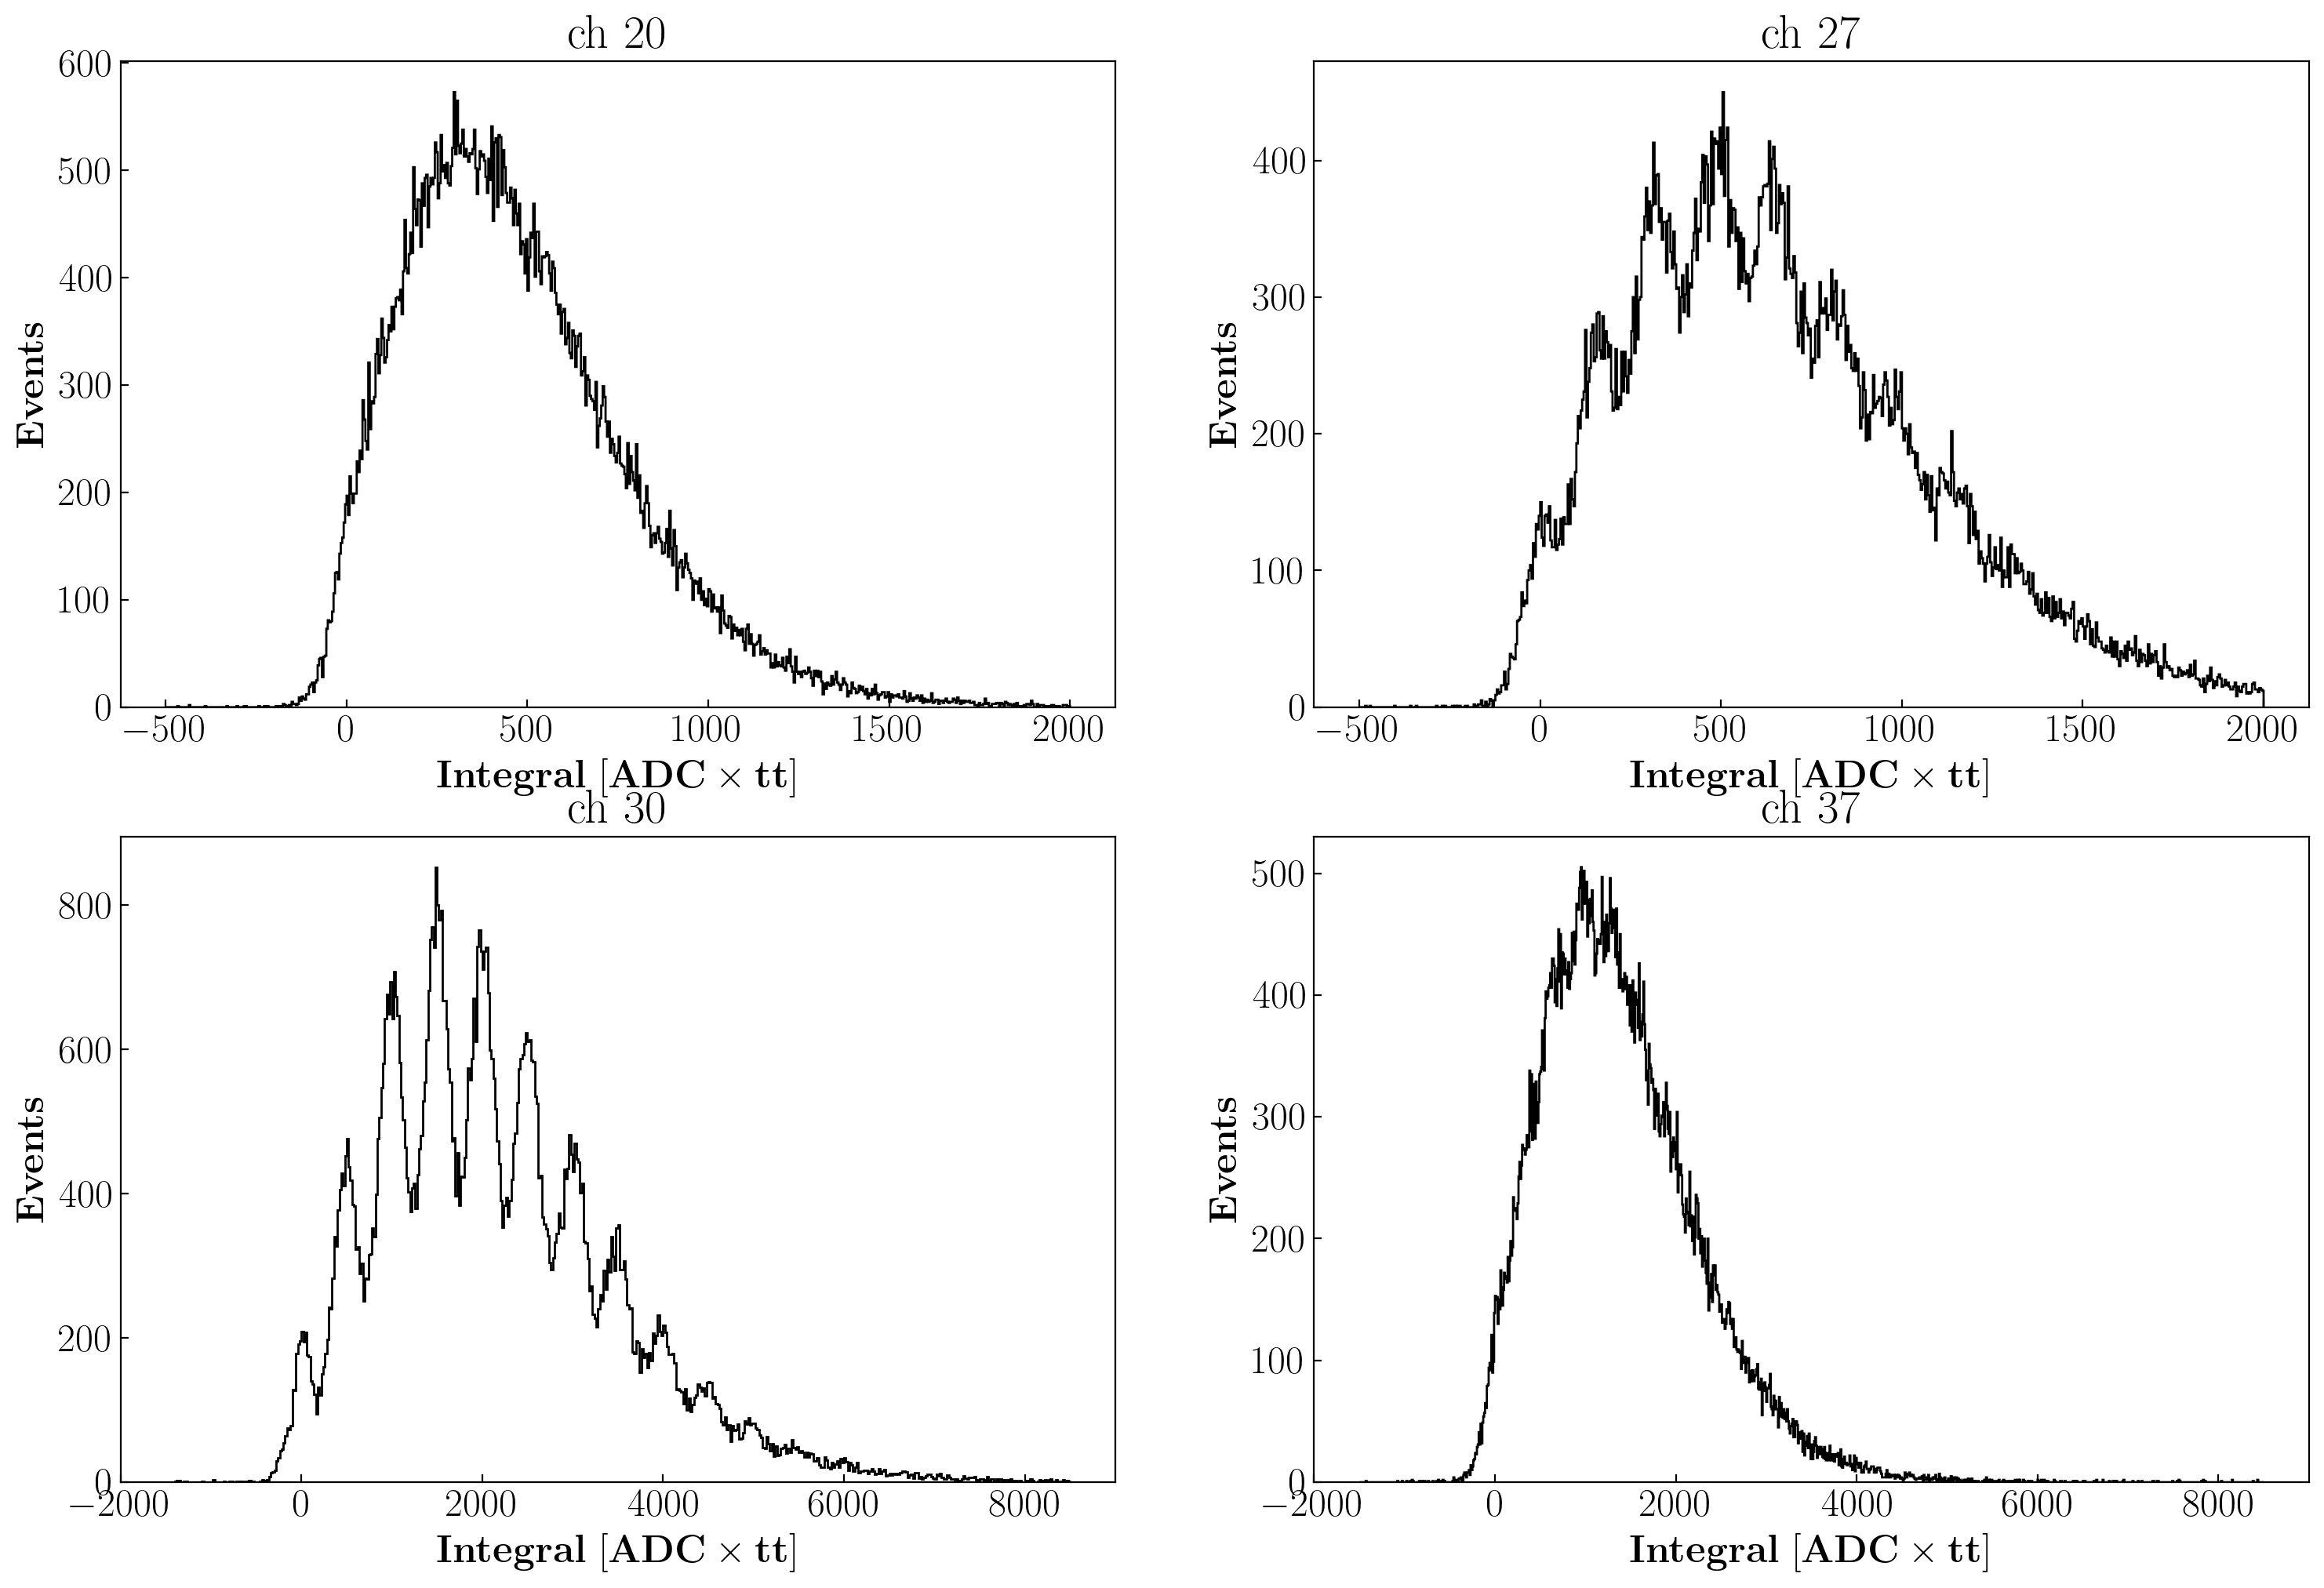

In [663]:
fig, axs = plt.subplots(2, 2, figsize=[18, 12], dpi=200)

h5 = axs[0,0].hist(np.sum(ch20[:, 175:200], axis=1), 625, [-.5e3, 2.e3], histtype='step', color='k')
h6 = axs[0,1].hist(np.sum(ch27[:, 175:200], axis=1), 625, [-.5e3, 2.e3], histtype='step', color='k')
h7 = axs[1,0].hist(np.sum(ch30[:, 175:220], axis=1), 500, [-1.5e3, 8.5e3], histtype='step', color='k')
h8 = axs[1,1].hist(np.sum(ch37[:, 175:215], axis=1), 1000, [-1.5e3, 8.5e3], histtype='step', color='k')

axs[0,0].set_title(r"$\mathrm{ch\ 20}$")
axs[0,1].set_title(r"$\mathrm{ch\ 27}$")
axs[1,0].set_title(r"$\mathrm{ch\ 30}$")
axs[1,1].set_title(r"$\mathrm{ch\ 37}$")
for i in range(2):
    for j in range(2):
        axs[i,j].set_ylabel(r"$\mathrm{\bf Events}$")
        axs[i,j].set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")

In [641]:
#print(b[:300])

In [642]:
a, b = h7[0], h7[1][:-1] + (h7[1][1] - h7[1][0])/2

b = b[a>0]
a = a[a>0]

b= b[20:310]
a= a[20:310]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum10)
msum = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 500 , sig1=30, N1=5e3,
              mu2 = 1000 , sig2=50, N2=0.5e3,
              mu3 = 1500 , sig3=50, N3=0.5e3,
              mu4 = 2000 , sig4=50, N4=0.5e3,
              mu5 = 2500 , sig5=100, N5=0.3e3,
              mu6 = 3000 , sig6=100, N6=0.02e3,
              mu7 = 3500 , sig7=150, N7=0.02e3,
              mu8 = 4500 , sig8=150, N8=0.02e3,
              mu9 = 5000 , sig9=150, N9=0.02e3,
              mu10 = 5500 , sig10=150, N10=0.02e3)

msum.errordef = 1

msum.limits['sig0'] = [20, 300]
msum.limits['sig1'] = [20, 300]
msum.limits['sig2'] = [50, 350]
msum.limits['sig3'] = [50, 350]
msum.limits['sig4'] = [50, 350]
msum.limits['sig5'] = [50, 350]
msum.limits['sig6'] = [50, 350]
msum.limits['sig7'] = [50, 350]
msum.limits['sig8'] = [50, 350]
msum.limits['sig9'] = [50, 350]
msum.limits['sig10'] = [50, 400]

msum.limits['N0'] = [100, 10e3]
msum.limits['N1'] = [100, 5e3]
msum.limits['N2'] = [100, 5e3]
msum.limits['N3'] = [100, 5e3]
msum.limits['N4'] = [100, 5e3]
msum.limits['N5'] = [100, 3e3]
msum.limits['N6'] = [10, 3e3]
msum.limits['N7'] = [10, 1e3]
msum.limits['N8'] = [10, 7e2]
msum.limits['N9'] = [10, 7e2]
msum.limits['N10'] = [10, 7e2]

msum.migrad()
msum.hesse()
msum.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 356.7 (χ²/ndof = 1.4)      │             Nfcn = 9531              │
│ EDM = 1.99e-06 (Goal: 0.0002)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0   │    15     │     5     │            │            │         │         │       │
│ 1 │ sig0  │    192    │     6     │            │            │   20    │   300   │       │
│ 2 │ N0    │    441    │    12     │            │            │   100   │  10000  │       │
│ 3 │ mu1   │   489.8   │    3.4    │            │            │         │         │       │
│ 4 │ sig1  │    205    │     6     │            │            │   20    │   300   │       │
│ 5 │ N1    │  1.106e3  │  0.017e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2   │   995.7   │    2.9    │            │            │         │         │       │
│ 7 │ sig2  │    223    │     6     │            │            │   50    │   350   │       │
│ 8 │ N2    │  1.702e3  │  0.022e3  │            │            │   100   │  5000   │       │
│ 9 │ mu3   │ 1.4980e3  │ 0.0028e3  │            │            │         │         │       │
│ 10│ sig3  │    211    │     6     │            │            │   50    │   350   │       │
│ 11│ N3    │  1.969e3  │  0.023e3  │            │            │   100   │  5000   │       │
│ 12│ mu4   │ 1.9951e3  │ 0.0031e3  │            │            │         │         │       │
│ 13│ sig4  │    222    │     7     │            │            │   50    │   350   │       │
│ 14│ N4    │  1.841e3  │  0.022e3  │            │            │   100   │  5000   │       │
│ 15│ mu5   │  2.496e3  │  0.004e3  │            │            │         │         │       │
│ 16│ sig5  │    221    │     8     │            │            │   50    │   350   │       │
│ 17│ N5    │  1.541e3  │  0.020e3  │            │            │   100   │  3000   │       │
│ 18│ mu6   │  2.997e3  │  0.005e3  │            │            │         │         │       │
│ 19│ sig6  │    231    │    10     │            │            │   50    │   350   │       │
│ 20│ N6    │  1.146e3  │  0.017e3  │            │            │   10    │  3000   │       │
│ 21│ mu7   │  3.485e3  │  0.007e3  │            │            │         │         │       │
│ 22│ sig7  │    219    │    13     │            │            │   50    │   350   │       │
│ 23│ N7    │    804    │    16     │            │            │   10    │  1000   │       │
│ 24│ mu8   │  3.976e3  │  0.009e3  │            │            │         │         │       │
│ 25│ sig8  │    254    │    23     │            │            │   50    │   350   │       │
│ 26│ N8    │    520    │    12     │            │            │   10    │   700   │       │
│ 27│ mu9   │  4.468e3  │  0.013e3  │            │            │         │         │       │
│ 28│ sig9  │    219    │    19     │            │            │   50    │   350   │       │
│ 29│ N9    │    291    │    12     │            │            │   10    │   700   │       │
│ 30│ mu10  │  4.997e3  │  0.017e3  │            │  

In [767]:
spevals["30"] = 389.8
speerrs["30"] = 3.4

2.5575023108439097


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 2.56$')

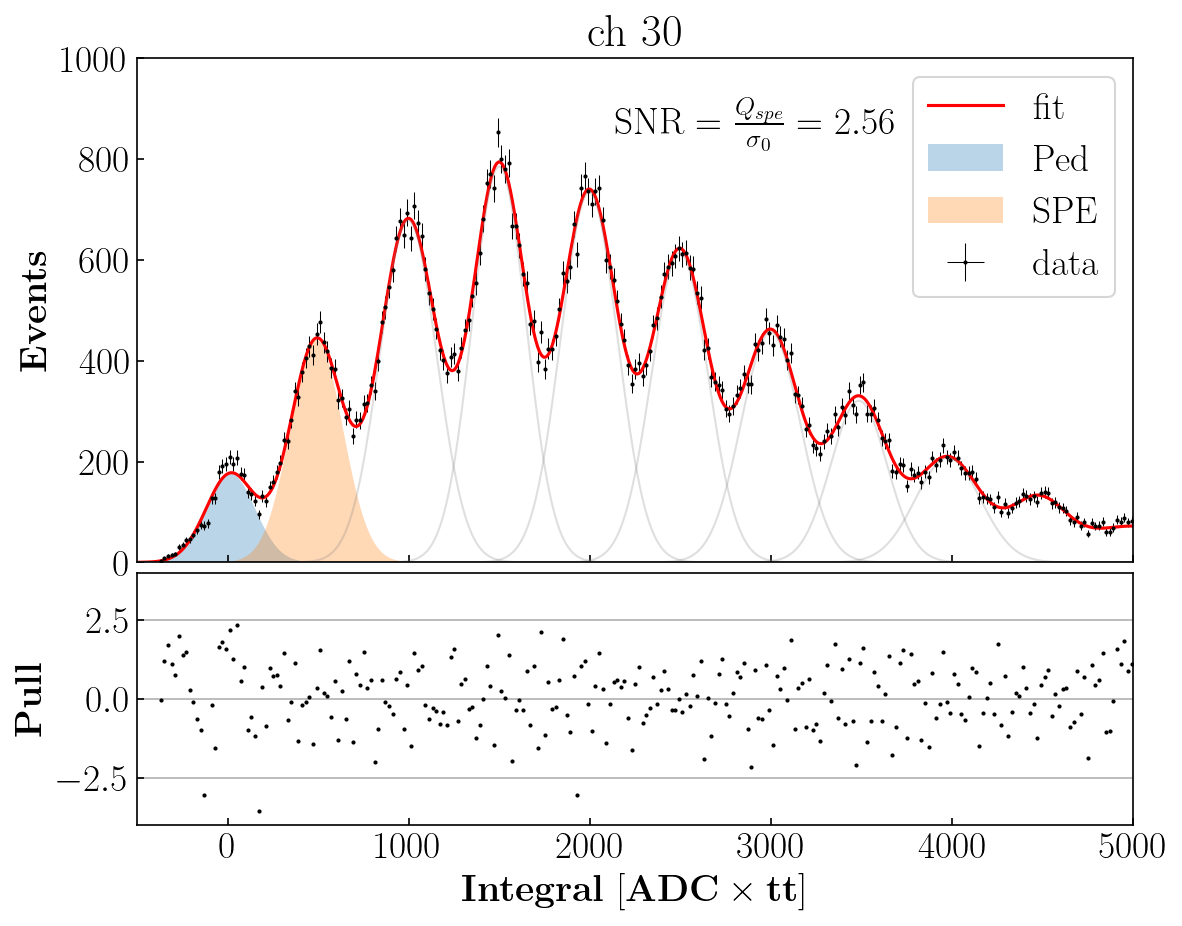

In [643]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum10(xx2, *msum.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum10(b, *msum.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 1000)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 30}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum.values['mu0']
xspe = msum.values['mu1']
sig0 = msum.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 2.56$', transform=ax1.transAxes)

In [644]:

a, b = h6[0], h6[1][:-1] + (h6[1][1] - h6[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

b= b[20:425]
a= a[20:425]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum2 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 250 , sig1=100, N1=5e3,
              mu2 = 500 , sig2=100, N2=0.5e3,
              mu3 = 7500 , sig3=100, N3=0.5e3,
              mu4 = 1000 , sig4=100, N4=0.5e3,
              mu5 = 1200 , sig5=100, N5=0.3e3,
              mu6 = 1500 , sig6=150, N6=0.02e3,
              mu7 = 1750 , sig7=150, N7=0.02e3,
              mu8 = 2000 , sig8=150, N8=0.02e3,
              mu9 = 2200 , sig9=150, N9=0.02e3)

msum2.errordef = 1

msum2.limits['mu0'] = [-30, 30]
msum2.limits['mu1'] = [100, 180]
msum2.limits['mu2'] = [250, 400]
msum2.limits['mu3'] = [450, 550]
msum2.limits['mu4'] = [550, 650]
msum2.limits['mu5'] = [700, 850]
msum2.limits['mu6'] = [850, 1050]

msum2.limits['mu7'] = [1000, 1150]

msum2.limits['mu8'] = [1300, 1450]
#msum2.limits['mu9'] = [3500, 10000]

msum2.limits['sig0'] = [20, 90]
msum2.limits['sig1'] = [20, 90]
msum2.limits['sig2'] = [70, 90]
msum2.limits['sig3'] = [70, 90]
msum2.limits['sig4'] = [70, 150]
msum2.limits['sig5'] = [80, 150]
msum2.limits['sig6'] = [90, 150]
msum2.limits['sig7'] = [90, 150]
msum2.limits['sig8'] = [90, 150]
msum2.limits['sig9'] = [80, 150]

msum2.limits['N0'] = [10, 10e3]
msum2.limits['N1'] = [10, 5e3]
msum2.limits['N2'] = [10, 5e3]
msum2.limits['N3'] = [10, 5e3]
msum2.limits['N4'] = [10, 5e3]
msum2.limits['N5'] = [10, 3e3]
msum2.limits['N6'] = [10, 3e3]
msum2.limits['N7'] = [10, 1e3]
msum2.limits['N8'] = [10, 5e2]
msum2.limits['N9'] = [10, 5e2]

msum2.migrad()
msum2.hesse()
msum2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 441.4 (χ²/ndof = 1.2)      │             Nfcn = 17042             │
│ EDM = 7.56e-05 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │           ABOVE call limit           │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │  4.2465   │  0.0000   │            │            │   -30   │   30    │       │
│ 1 │ sig0 │ 7.1716e1  │ 0.0000e1  │            │            │   20    │   90    │       │
│ 2 │ N0   │ 3.0163e2  │ 0.0000e2  │            │            │   10    │  10000  │       │
│ 3 │ mu1  │ 1.5341e2  │ 0.0000e2  │            │            │   100   │   180   │       │
│ 4 │ sig1 │  7.623e1  │  0.000e1  │            │            │   20    │   90    │       │
│ 5 │ N1   │ 6.4631e2  │ 0.0000e2  │            │            │   10    │  5000   │       │
│ 6 │ mu2  │ 3.1555e2  │ 0.0000e2  │            │            │   250   │   400   │       │
│ 7 │ sig2 │ 8.7767e1  │ 0.0000e1  │            │            │   70    │   90    │       │
│ 8 │ N2   │ 9.0174e2  │ 0.0000e2  │            │            │   10    │  5000   │       │
│ 9 │ mu3  │ 4.8539e2  │ 0.0000e2  │            │            │   450   │   550   │       │
│ 10│ sig3 │    9e1    │    0e1    │            │            │   70    │   90    │       │
│ 11│ N3   │ 9.8127e2  │ 0.0000e2  │            │            │   10    │  5000   │       │
│ 12│ mu4  │ 6.4678e2  │ 0.0000e2  │            │            │   550   │   650   │       │
│ 13│ sig4 │ 8.4811e1  │ 0.0000e1  │            │            │   70    │   150   │       │
│ 14│ N4   │ 8.9177e2  │ 0.0000e2  │            │            │   10    │  5000   │       │
│ 15│ mu5  │ 8.0955e2  │ 0.0000e2  │            │            │   700   │   850   │       │
│ 16│ sig5 │ 9.3366e1  │ 0.0000e1  │            │            │   80    │   150   │       │
│ 17│ N5   │ 6.9961e2  │ 0.0000e2  │            │            │   10    │  3000   │       │
│ 18│ mu6  │  9.689e2  │  0.000e2  │            │            │   850   │  1050   │       │
│ 19│ sig6 │    9e1    │    0e1    │            │            │   90    │   150   │       │
│ 20│ N6   │ 4.9103e2  │ 0.0000e2  │            │            │   10    │  3000   │       │
│ 21│ mu7  │ 1.1348e3  │ 0.0000e3  │            │            │  1000   │  1150   │       │
│ 22│ sig7 │ 1.1227e2  │ 0.0000e2  │            │            │   90    │   150   │       │
│ 23│ N7   │ 3.5477e2  │ 0.0000e2  │            │            │   10    │  1000   │       │
│ 24│ mu8  │ 1.3513e3  │ 0.0000e3  │            │            │  1300   │  1450   │       │
│ 25│ sig8 │   1.5e2   │   0.0e2   │            │            │   90    │   150   │       │
│ 26│ N8   │  2.215e2  │  0.000e2  │            │            │   10    │   500   │       │
│ 27│ mu9  │ 1.4317e1  │ 0.0000e1  │            │            │         │         │       │
│ 28│ sig9 │    8e1    │    0e1    │            │            │   80    │   150   │       │
│ 29│ N9   │ 1.1706e1  │ 0.0000e1  │            │            │   10    │   500   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [768]:
spevals["27"] = 192
speerrs["27"] = 22

2.1390921918521704


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 2.13$')

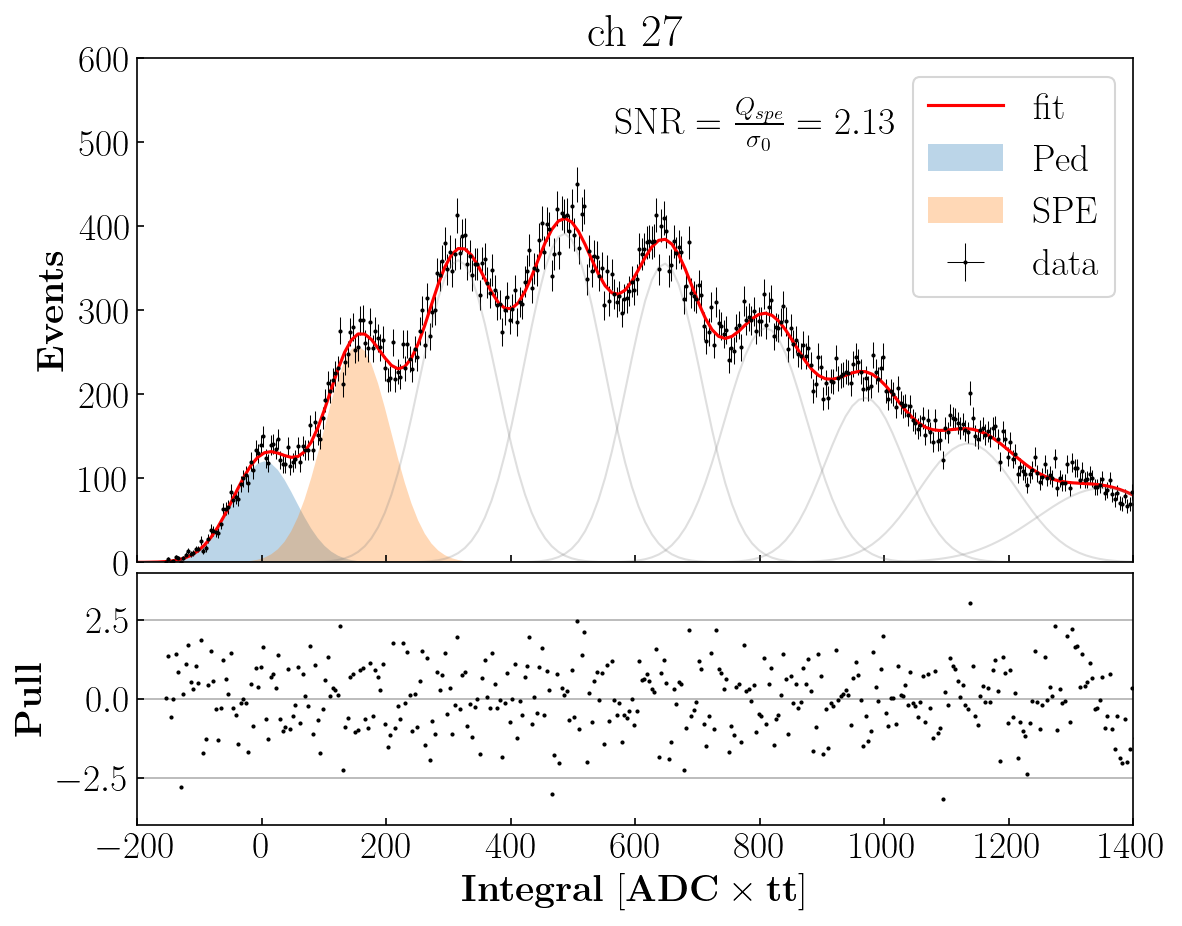

In [645]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum2.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum2.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.2e3, 1.4e3)
ax1.set_ylim(0, 600)
ax2.set_xlim(-0.2e3, 1.4e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum2.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum2.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum2.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 27}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum2.values['mu0']
xspe = msum2.values['mu1']
sig0 = msum2.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 2.13$', transform=ax1.transAxes)

In [658]:

a, b = h5[0], h5[1][:-1] + (h5[1][1] - h5[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

b= b[20:425]
a= a[20:425]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum3 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 250 , sig1=100, N1=5e3,
              mu2 = 500 , sig2=100, N2=0.5e3,
              mu3 = 7500 , sig3=100, N3=0.5e3,
              mu4 = 1000 , sig4=100, N4=0.5e3,
              mu5 = 1200 , sig5=100, N5=0.3e3,
              mu6 = 1500 , sig6=150, N6=0.02e3,
              mu7 = 1750 , sig7=150, N7=0.02e3,
              mu8 = 2000 , sig8=150, N8=0.02e3,
              mu9 = 2200 , sig9=150, N9=0.02e3)

msum3.errordef = 1

msum3.limits['mu0'] = [-50, 50]
#msum3.limits['mu1'] = [50, 180]
#msum3.limits['mu2'] = [250, 400]
#msum3.limits['mu3'] = [450, 550]
#msum3.limits['mu4'] = [550, 650]
#msum3.limits['mu5'] = [700, 850]
#msum3.limits['mu6'] = [850, 1050]

msum3.limits['mu7'] = [5000, 5150]
msum3.limits['mu8'] = [5300, 5450]
msum3.limits['mu9'] = [5500, 50000]

msum3.limits['sig0'] = [30, 70]
msum3.limits['sig1'] = [30, 70]
msum3.limits['sig2'] = [70, 140]
msum3.limits['sig3'] = [70, 120]
msum3.limits['sig4'] = [70, 150]
msum3.limits['sig5'] = [80, 150]
msum3.limits['sig6'] = [90, 150]
msum3.limits['sig7'] = [90, 150]
msum3.limits['sig8'] = [90, 150]
msum3.limits['sig9'] = [80, 150]

msum3.limits['N0'] = [100, 10e3]
msum3.limits['N1'] = [100, 5e3]
msum3.limits['N2'] = [10, 5e3]
msum3.limits['N3'] = [10, 5e3]
msum3.limits['N4'] = [10, 5e3]
msum3.limits['N5'] = [10, 3e3]
msum3.limits['N6'] = [10, 3e3]
msum3.limits['N7'] = [10, 1e3]
msum3.limits['N8'] = [10, 5e2]
msum3.limits['N9'] = [10, 5e2]

msum3.migrad()
msum3.hesse()
msum3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1402 (χ²/ndof = 3.7)       │             Nfcn = 5782              │
│ EDM = 4.7e-05 (Goal: 0.0002)     │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │   25.8    │    1.7    │            │            │   -50   │   50    │       │
│ 1 │ sig0 │   70.00   │   0.06    │            │            │   30    │   70    │       │
│ 2 │ N0   │    531    │    15     │            │            │   100   │  10000  │       │
│ 3 │ mu1  │   145.2   │    2.9    │            │            │         │         │       │
│ 4 │ sig1 │   70.00   │   0.04    │            │            │   30    │   70    │       │
│ 5 │ N1   │    715    │    22     │            │            │   100   │  5000   │       │
│ 6 │ mu2  │   314.2   │    3.3    │            │            │         │         │       │
│ 7 │ sig2 │  140.000  │   0.031   │            │            │   70    │   140   │       │
│ 8 │ N2   │  1.337e3  │  0.011e3  │            │            │   10    │  5000   │       │
│ 9 │ mu3  │ 7.5000e3  │ 0.0014e3  │            │            │         │         │       │
│ 10│ sig3 │    100    │    40     │            │            │   70    │   120   │       │
│ 11│ N3   │   0.5e3   │   2.6e3   │            │            │   10    │  5000   │       │
│ 12│ mu4  │    563    │     4     │            │            │         │         │       │
│ 13│ sig4 │  150.00   │   0.03    │            │            │   70    │   150   │       │
│ 14│ N4   │    991    │    12     │            │            │   10    │  5000   │       │
│ 15│ mu5  │    839    │     5     │            │            │         │         │       │
│ 16│ sig5 │  150.000  │   0.029   │            │            │   80    │   150   │       │
│ 17│ N5   │    452    │     8     │            │            │   10    │  3000   │       │
│ 18│ mu6  │  1.146e3  │  0.007e3  │            │            │         │         │       │
│ 19│ sig6 │  150.00   │   0.11    │            │            │   90    │   150   │       │
│ 20│ N6   │    147    │     4     │            │            │   10    │  3000   │       │
│ 21│ mu7  │  5.00e3   │  0.11e3   │            │            │  5000   │  5150   │       │
│ 22│ sig7 │    150    │    40     │            │            │   90    │   150   │       │
│ 23│ N7   │     0     │   0.7e3   │            │            │   10    │  1000   │       │
│ 24│ mu8  │  5.30e3   │  0.11e3   │            │            │  5300   │  5450   │       │
│ 25│ sig8 │    150    │    40     │            │            │   90    │   150   │       │
│ 26│ N8   │  0.02e3   │  0.31e3   │            │            │   10    │   500   │       │
│ 27│ mu9  │  0.006e6  │  0.032e6  │            │            │  5500   │  50000  │       │
│ 28│ sig9 │    150    │    50     │            │            │   80    │   150   │       │
│ 29│ N9   │  0.02e3   │  0.31e3   │            │            │   10    │   500   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [769]:
spevals["20"] = 145
speerrs["20"] = 2.9

1.7061131461604209


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 1.81$')

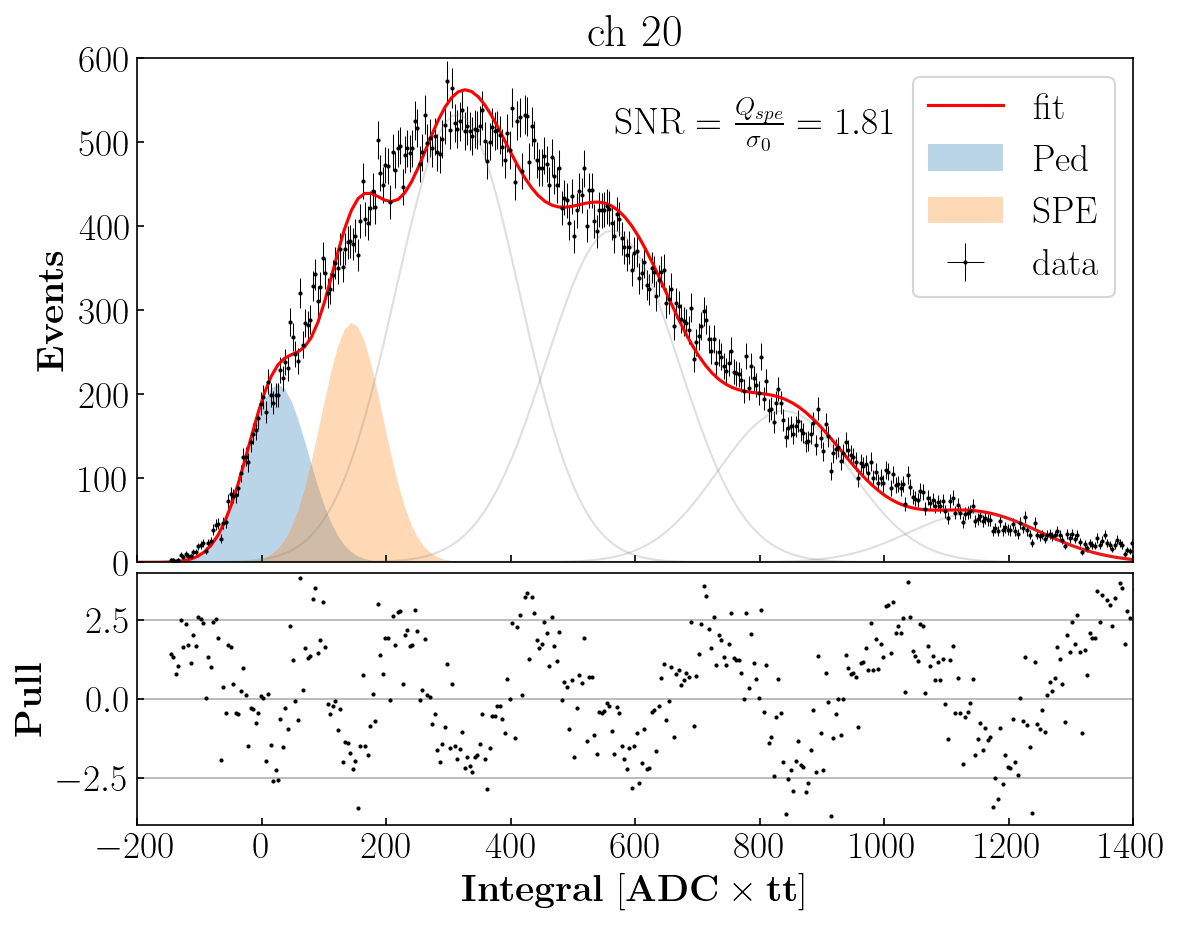

In [659]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum3.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum3.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.2e3, 1.4e3)
ax1.set_ylim(0, 600)
ax2.set_xlim(-0.2e3, 1.4e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum3.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum3.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum3.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 20}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum3.values['mu0']
xspe = msum3.values['mu1']
sig0 = msum3.values['sig0']
print((xspe-xped)/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 1.81$', transform=ax1.transAxes)

In [648]:

a, b = h8[0], h8[1][:-1] + (h8[1][1] - h8[1][0])/2

b = b[np.where(a>0)]
a = a[np.where(a>0)]

b= b[20:425]
a= a[20:425]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum)
msum4 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 250 , sig1=100, N1=5e3,
              mu2 = 500 , sig2=100, N2=0.5e3,
              mu3 = 7500 , sig3=100, N3=0.5e3,
              mu4 = 1000 , sig4=100, N4=0.5e3,
              mu5 = 1200 , sig5=100, N5=0.3e3,
              mu6 = 1500 , sig6=150, N6=0.02e3,
              mu7 = 1750 , sig7=150, N7=0.02e3,
              mu8 = 2000 , sig8=150, N8=0.02e3,
              mu9 = 2200 , sig9=150, N9=0.02e3)

msum4.errordef = 1

msum4.limits['mu0'] = [-50, 50]
msum4.limits['mu1'] = [300, 400]
msum4.limits['mu2'] = [600, 700]
msum4.limits['mu3'] = [900, 1000]
msum4.limits['mu4'] = [1300, 1600]
#msum4.limits['mu5'] = [700, 850]
#msum4.limits['mu6'] = [850, 1050]

#msum4.limits['mu7'] = [1000, 1150]

#msum4.limits['mu8'] = [1300, 1450]
#msum4.limits['mu9'] = [3500, 10000]

msum4.limits['sig0'] = [80, 180]
msum4.limits['sig1'] = [80, 180]
msum4.limits['sig2'] = [70, 180]
msum4.limits['sig3'] = [70, 200]
msum4.limits['sig4'] = [70, 200]
msum4.limits['sig5'] = [80, 200]
msum4.limits['sig6'] = [90, 250]
msum4.limits['sig7'] = [90, 250]
msum4.limits['sig8'] = [90, 250]
msum4.limits['sig9'] = [80, 250]

msum4.limits['N0'] = [300, 10e3]
msum4.limits['N1'] = [300, 5e3]
msum4.limits['N2'] = [10, 5e3]
msum4.limits['N3'] = [10, 5e3]
msum4.limits['N4'] = [10, 5e3]
msum4.limits['N5'] = [10, 3e3]
msum4.limits['N6'] = [10, 3e3]
msum4.limits['N7'] = [10, 1e3]
msum4.limits['N8'] = [10, 5e2]
msum4.limits['N9'] = [10, 5e2]

msum4.migrad()
msum4.hesse()
msum4.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 526.9 (χ²/ndof = 1.4)      │             Nfcn = 10065             │
│ EDM = 3.04e-05 (Goal: 0.0002)    │            time = 0.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0  │    37     │     5     │            │            │   -50   │   50    │       │
│ 1 │ sig0 │   180.0   │    0.6    │            │            │   80    │   180   │       │
│ 2 │ N0   │    317    │    11     │            │            │   300   │  10000  │       │
│ 3 │ mu1  │    336    │     6     │            │            │   300   │   400   │       │
│ 4 │ sig1 │   180.0   │    1.5    │            │            │   80    │   180   │       │
│ 5 │ N1   │    638    │    13     │            │            │   300   │  5000   │       │
│ 6 │ mu2  │    637    │     5     │            │            │   600   │   700   │       │
│ 7 │ sig2 │   180.0   │    1.7    │            │            │   70    │   180   │       │
│ 8 │ N2   │    948    │    16     │            │            │   10    │  5000   │       │
│ 9 │ mu3  │    958    │     5     │            │            │   900   │  1000   │       │
│ 10│ sig3 │   200.0   │    2.4    │            │            │   70    │   200   │       │
│ 11│ N3   │  1.116e3  │  0.016e3  │            │            │   10    │  5000   │       │
│ 12│ mu4  │  1.600e3  │  0.007e3  │            │            │  1300   │  1600   │       │
│ 13│ sig4 │   200.0   │    1.2    │            │            │   70    │   200   │       │
│ 14│ N4   │    806    │    17     │            │            │   10    │  5000   │       │
│ 15│ mu5  │  1.285e3  │  0.004e3  │            │            │         │         │       │
│ 16│ sig5 │   200.0   │    2.3    │            │            │   80    │   200   │       │
│ 17│ N5   │  1.023e3  │  0.016e3  │            │            │   10    │  3000   │       │
│ 18│ mu6  │  2.395e3  │  0.010e3  │            │            │         │         │       │
│ 19│ sig6 │   250.0   │    0.8    │            │            │   90    │   250   │       │
│ 20│ N6   │    404    │     8     │            │            │   10    │  3000   │       │
│ 21│ mu7  │  1.961e3  │  0.006e3  │            │            │         │         │       │
│ 22│ sig7 │   250.0   │    1.1    │            │            │   90    │   250   │       │
│ 23│ N7   │    669    │    10     │            │            │   10    │  1000   │       │
│ 24│ mu8  │  2.842e3  │  0.013e3  │            │            │         │         │       │
│ 25│ sig8 │   250.0   │    0.9    │            │            │   90    │   250   │       │
│ 26│ N8   │    224    │     6     │            │            │   10    │   500   │       │
│ 27│ mu9  │  3.299e3  │  0.013e3  │            │            │         │         │       │
│ 28│ sig9 │    250    │     1     │            │            │   80    │   250   │       │
│ 29│ N9   │    115    │     5     │            │            │   10    │   500   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───

In [770]:
spevals["37"] = 336
speerrs["37"] = 6

1.6588249364802718


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 1.66$')

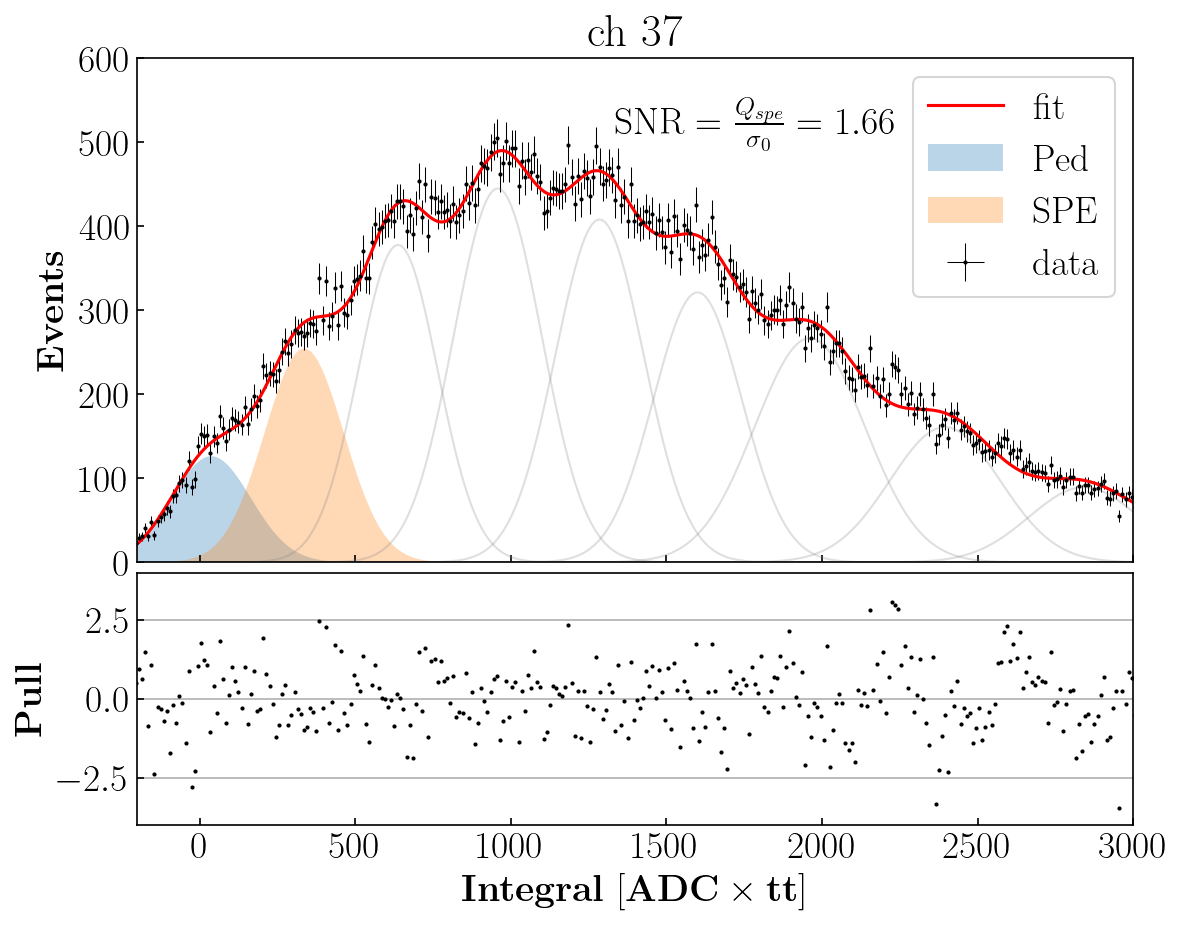

In [649]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum(xx2, *msum4.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum(b, *msum4.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.2e3, 3.e3)
ax1.set_ylim(0, 600)
ax2.set_xlim(-0.2e3, 3.e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum4.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum4.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum4.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 37}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum4.values['mu0']
xspe = msum4.values['mu1']
sig0 = msum4.values['sig0']
print((xspe-xped)/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 1.66$', transform=ax1.transAxes)

Text(0, 0.5, '$\\mathrm{\\bf Integral, [ADC \\times tt]}$')

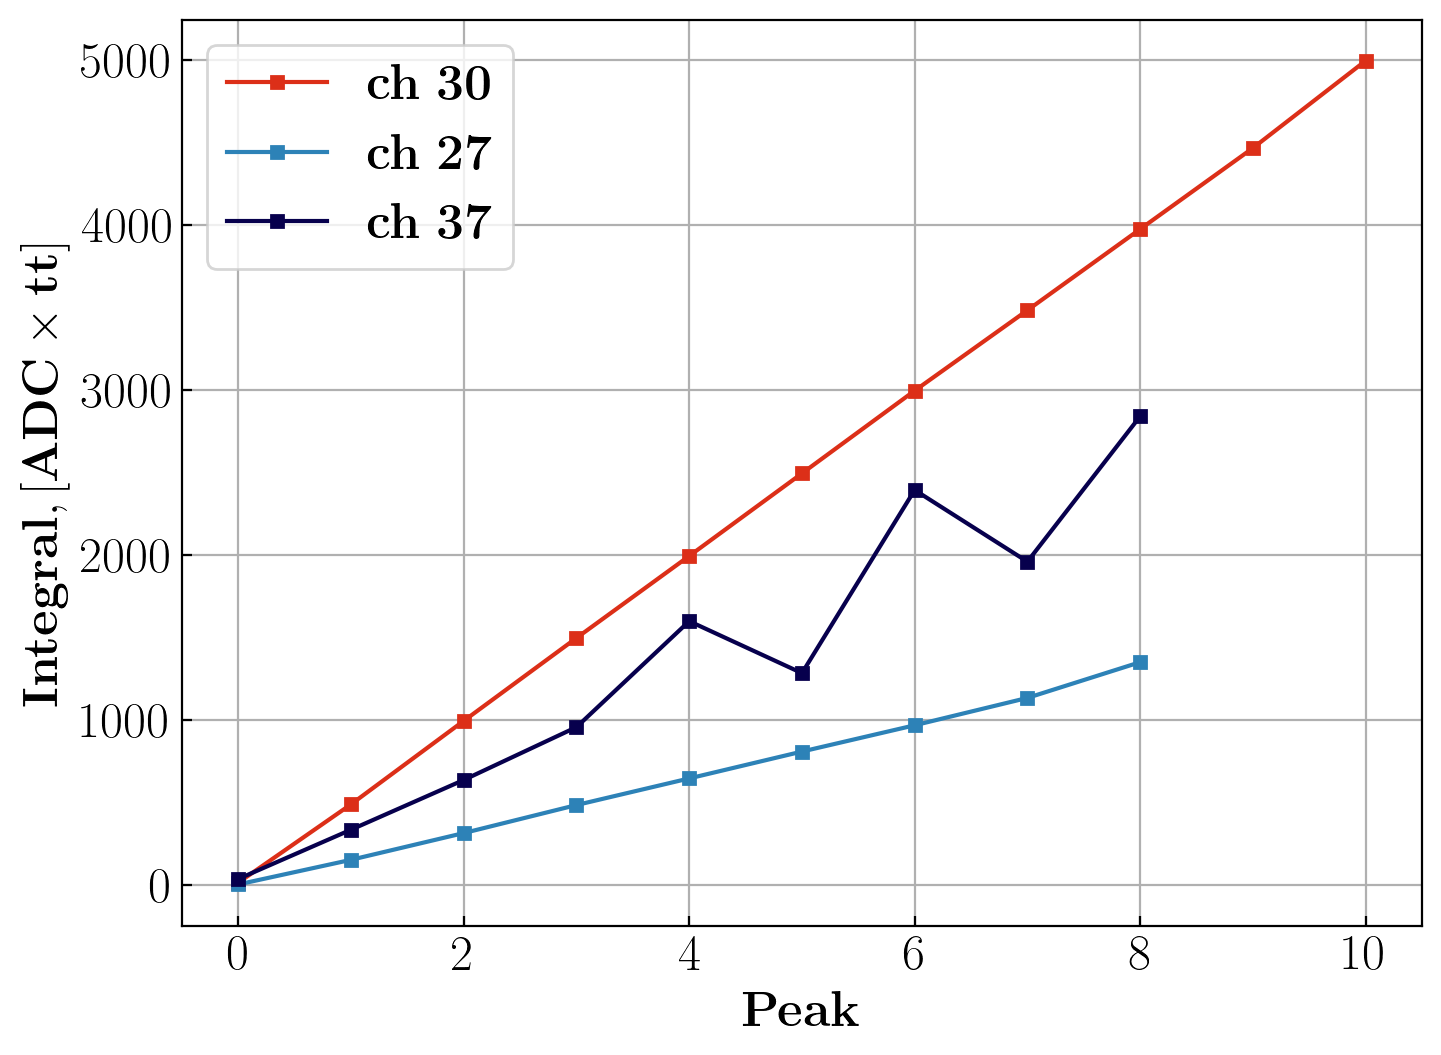

In [661]:
fig, ax = plt.subplots(figsize=[8,6], dpi=200)

pks = np.arange(9)
pks1 = np.arange(11)

ax.plot(pks1, msum.values[0::3], color=c1, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 30}$')
ax.plot(pks, (msum2.values[0::3])[:9], color=c2, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 27}$')
#ax.plot(pks, (msum3.values[0::3])[:9], color=c3, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 10}$')
ax.plot(pks, (msum4.values[0::3])[:9], color=c4, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 37}$')

ax.grid(axis='both')
ax.legend(loc='best')
ax.set_xlabel(r"$\mathrm{\bf Peak}$")
ax.set_ylabel(r"$\mathrm{\bf Integral, [ADC \times tt]}$")

In [771]:
dir = "/Users/vitaliy/Desktop/daq/mdoc/caldata/24098/"
runNo = 24098
src = 3
ch = 21
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch21 = np.concatenate([dat0, dat1])
del dat0, dat1


src = 4
ch = 36
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = dir + f"adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch36 = np.concatenate([dat0, dat1])

del dat0, dat1

In [772]:
evts = ch21.shape[0]
ch21 = ch21.reshape(evts*16, int(ch21.shape[1]/16))
ch36 = ch36.reshape(evts*16, int(ch36.shape[1]/16))


In [773]:
ch21 = ch21[:, 2350:2800]
ch36 = ch36[:, 2350:2800]

In [774]:
peds = np.array([np.argmax(np.bincount(ch21[i])) for i in range(len(ch21))])
peds = peds[:, np.newaxis]
ch21 = ch21 - peds
ch21 = -1*ch21

peds = np.array([np.argmax(np.bincount(ch36[i])) for i in range(len(ch36))])
peds = peds[:, np.newaxis]
ch36 = ch36 - peds
ch36 = -1*ch36

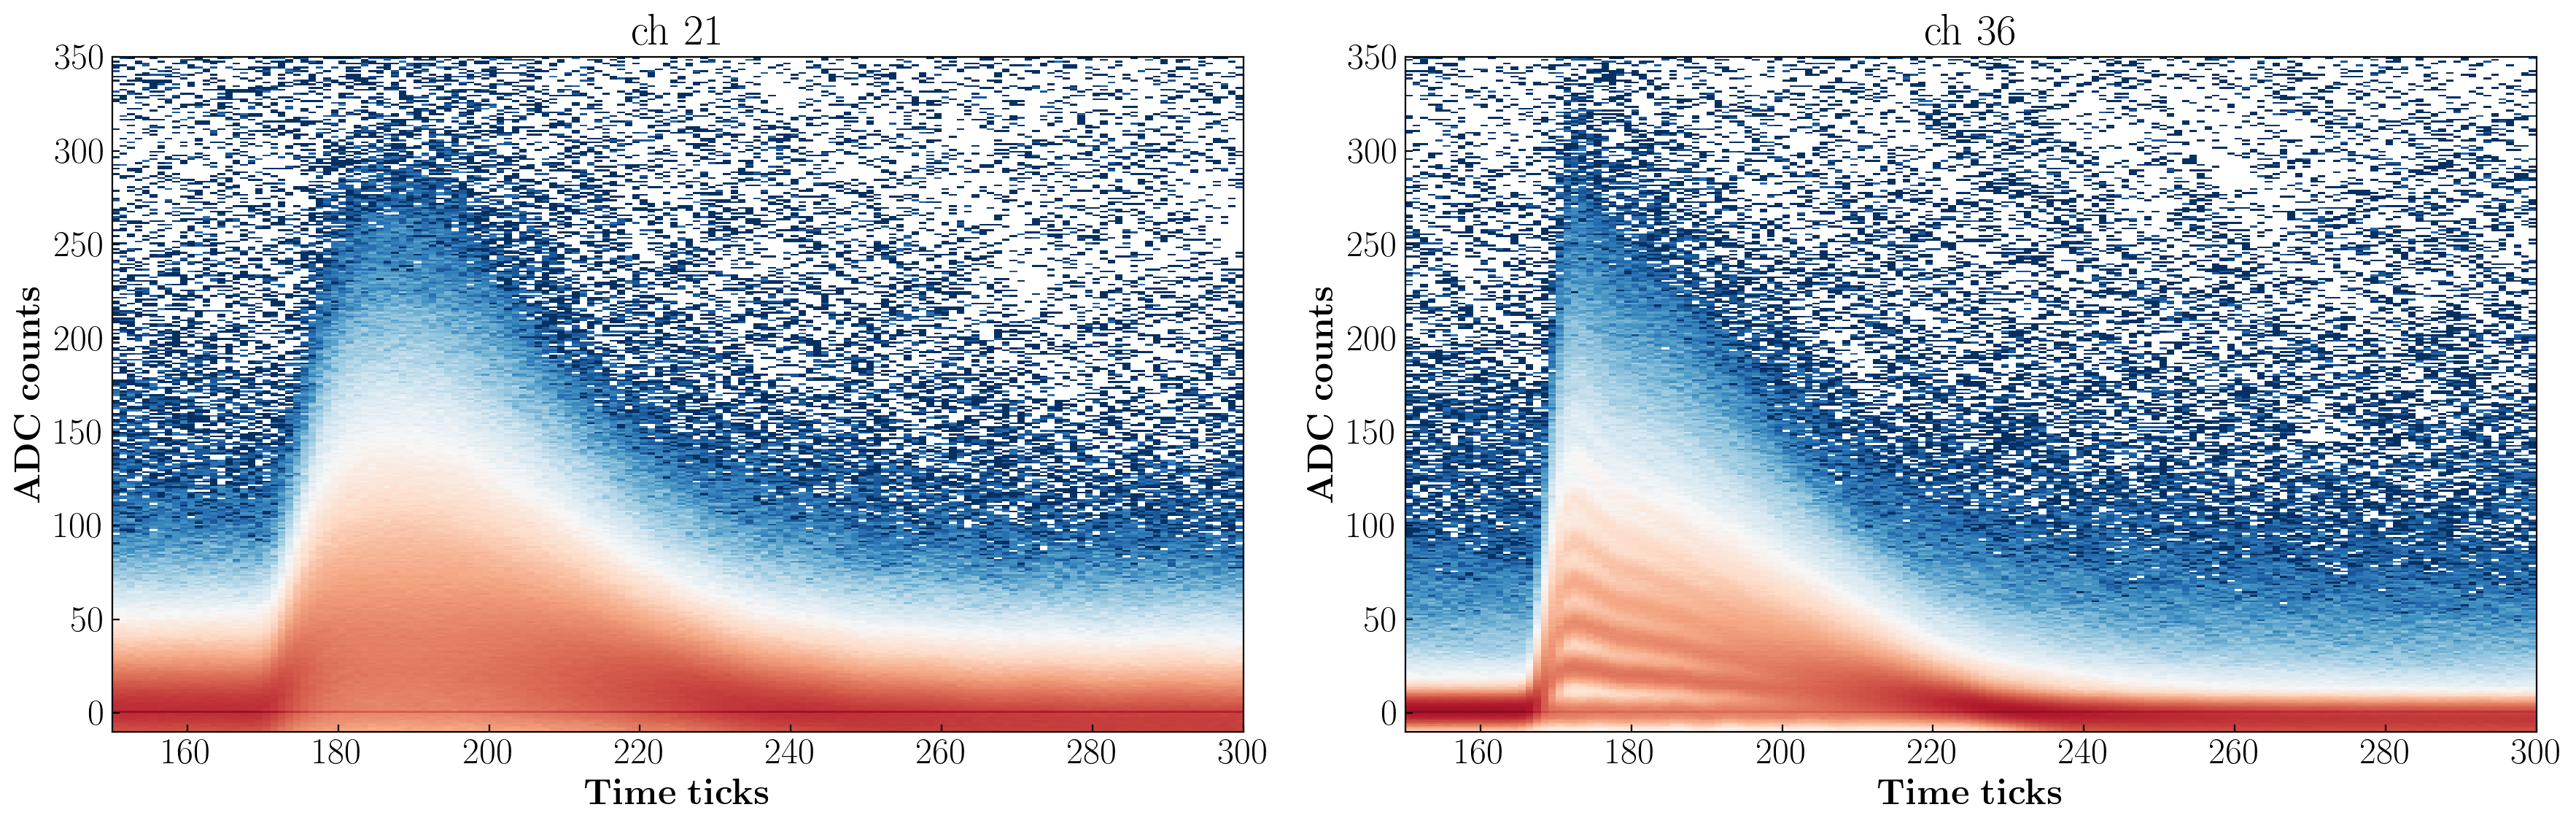

In [775]:
fig, axs = plt.subplots(1, 2, figsize=[18, 6], dpi=200)

xxs3 = np.ones(ch21.shape) + np.arange(ch21.shape[1])
axs[0].hist2d(xxs3.flatten(), ch21.flatten(), [ch21.shape[1], 370], [[0, ch21.shape[1]], [-20, 350]], norm = colors.LogNorm(), cmap='RdBu_r')
axs[1].hist2d(xxs3.flatten(), ch36.flatten(), [ch36.shape[1], 360], [[0, ch36.shape[1]], [-10, 350]], norm = colors.LogNorm(), cmap='RdBu_r')

for i in range(2):
        axs[i].set_ylim(-10, 350)
        axs[i].set_xlim(150, 300)

        axs[i].set_ylabel(r"$\mathrm{\bf ADC\ counts}$")
        axs[i].set_xlabel(r"$\mathrm{\bf Time\ ticks}$")

axs[0].set_title(r"$\mathrm{ch\ 21}$")
axs[1].set_title(r"$\mathrm{ch\ 36}$")


plt.tight_layout()

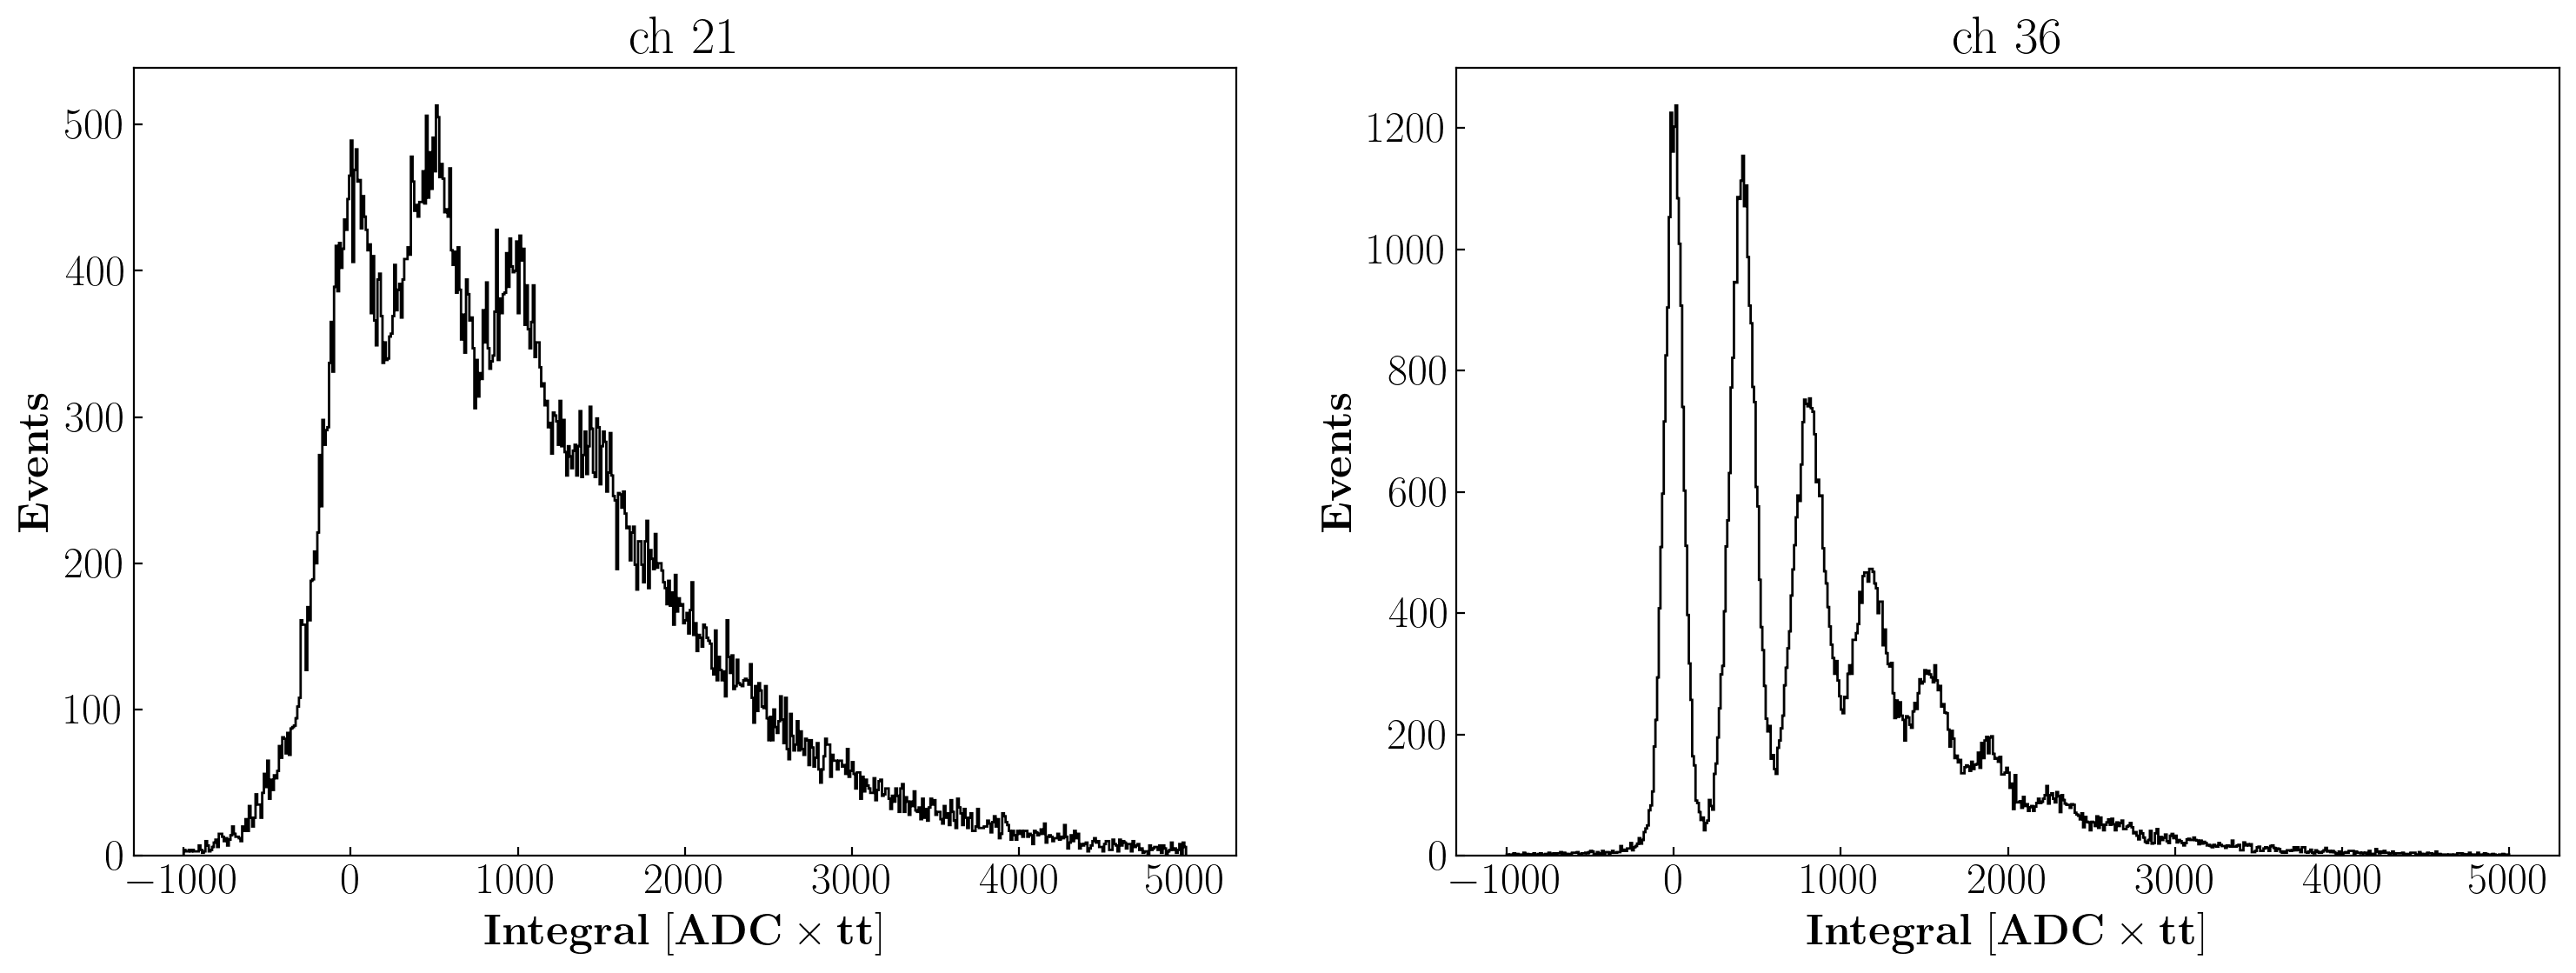

In [776]:
fig, axs = plt.subplots(1, 2, figsize=[18, 6], dpi=200)

h9 = axs[0].hist(np.sum(ch21[:, 175:200], axis=1), 600, [-1.e3, 5.e3], histtype='step', color='k')
h10 = axs[1].hist(np.sum(ch36[:, 175:200], axis=1), 600, [-1e3, 5.e3], histtype='step', color='k')


axs[0].set_title(r"$\mathrm{ch\ 21}$")
axs[1].set_title(r"$\mathrm{ch\ 36}$")

for i in range(2):
    axs[i].set_ylabel(r"$\mathrm{\bf Events}$")
    axs[i].set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")

In [777]:
a, b = h9[0], h9[1][:-1] + (h9[1][1] - h9[1][0])/2

b = b[a>0]
a = a[a>0]

#b= b[20:310]
#a= a[20:310]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum10)
msum = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 = 500 , sig1=30, N1=5e3,
              mu2 = 1000 , sig2=50, N2=0.5e3,
              mu3 = 1500 , sig3=50, N3=0.5e3,
              mu4 = 2000 , sig4=50, N4=0.5e3,
              mu5 = 2500 , sig5=100, N5=0.3e3,
              mu6 = 3000 , sig6=100, N6=0.02e3,
              mu7 = 3500 , sig7=150, N7=0.02e3,
              mu8 = 4500 , sig8=150, N8=0.02e3,
              mu9 = 5000 , sig9=150, N9=0,
              mu10 = 5500 , sig10=150, N10=0)

msum.errordef = 1

msum.limits['sig0'] = [20, 300]
msum.limits['sig1'] = [20, 300]
msum.limits['sig2'] = [50, 350]
msum.limits['sig3'] = [50, 350]
msum.limits['sig4'] = [50, 350]
msum.limits['sig5'] = [50, 350]
msum.limits['sig6'] = [50, 350]
msum.limits['sig7'] = [50, 350]
msum.limits['sig8'] = [50, 350]
msum.limits['sig9'] = [50, 350]
msum.limits['sig10'] = [50, 400]

msum.limits['mu0'] = [-30, 30]
msum.limits['mu1'] = [300, 700]
msum.limits['mu2'] = [900, 1100]
msum.limits['mu3'] = [1400, 1600]
msum.limits['mu4'] = [1900, 2100]
msum.limits['mu5'] = [2400, 2500]
msum.limits['mu6'] = [2900, 3100]

msum.limits['N0'] = [100, 10e3]
msum.limits['N1'] = [100, 5e3]
msum.limits['N2'] = [100, 5e3]
msum.limits['N3'] = [100, 5e3]
msum.limits['N4'] = [100, 5e3]
msum.limits['N5'] = [100, 3e3]
msum.limits['N6'] = [10, 3e3]
msum.limits['N7'] = [10, 1e3]
msum.limits['N8'] = [10, 7e2]
msum.fixed['N9'] = True
msum.fixed['N10'] = True

msum.limits['N9'] = [10, 7e2]
msum.limits['N10'] = [10, 7e2]

msum.migrad()
msum.hesse()
msum.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1220 (χ²/ndof = 2.1)       │             Nfcn = 9592              │
│ EDM = 9.9e-05 (Goal: 0.0002)     │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0   │   13.2    │    2.6    │            │            │   -30   │   30    │       │
│ 1 │ sig0  │  300.00   │   0.24    │            │            │   20    │   300   │       │
│ 2 │ N0    │  1.044e3  │  0.011e3  │            │            │   100   │  10000  │       │
│ 3 │ mu1   │    506    │     5     │            │            │   300   │   700   │       │
│ 4 │ sig1  │    243    │     7     │            │            │   20    │   300   │       │
│ 5 │ N1    │  1.104e3  │  0.015e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2   │    966    │     4     │            │            │   900   │  1100   │       │
│ 7 │ sig2  │    252    │    11     │            │            │   50    │   350   │       │
│ 8 │ N2    │    912    │    20     │            │            │   100   │  5000   │       │
│ 9 │ mu3   │  1.421e3  │  0.014e3  │            │            │  1400   │  1600   │       │
│ 10│ sig3  │    302    │     6     │            │            │   50    │   350   │       │
│ 11│ N3    │    611    │    12     │            │            │   100   │  5000   │       │
│ 12│ mu4   │  1.900e3  │  0.026e3  │            │            │  1900   │  2100   │       │
│ 13│ sig4  │    341    │    16     │            │            │   50    │   350   │       │
│ 14│ N4    │    386    │    17     │            │            │   100   │  5000   │       │
│ 15│ mu5   │  2.40e3   │  0.07e3   │            │            │  2400   │  2500   │       │
│ 16│ sig5  │    331    │    28     │            │            │   50    │   350   │       │
│ 17│ N5    │    221    │    14     │            │            │   100   │  3000   │       │
│ 18│ mu6   │  2.930e3  │  0.032e3  │            │            │  2900   │  3100   │       │
│ 19│ sig6  │    350    │    24     │            │            │   50    │   350   │       │
│ 20│ N6    │    133    │     9     │            │            │   10    │  3000   │       │
│ 21│ mu7   │  3.512e3  │  0.027e3  │            │            │         │         │       │
│ 22│ sig7  │    350    │    19     │            │            │   50    │   350   │       │
│ 23│ N7    │   65.1    │    3.5    │            │            │   10    │  1000   │       │
│ 24│ mu8   │  4.086e3  │  0.020e3  │            │            │         │         │       │
│ 25│ sig8  │    350    │    20     │            │            │   50    │   350   │       │
│ 26│ N8    │   31.9    │    2.0    │            │            │   10    │   700   │       │
│ 27│ mu9   │  4.697e3  │  0.034e3  │            │            │         │         │       │
│ 28│ sig9  │    350    │    40     │            │            │   50    │   350   │       │
│ 29│ N9    │   10.0    │    0.1    │            │            │   10    │   700   │  yes  │
│ 30│ mu10  │ 6.1067e3  │ 0.0014e3  │            │  

In [779]:
spevals["21"] = 506
speerrs["21"] = 5

1.6863923346324212


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 1.69$')

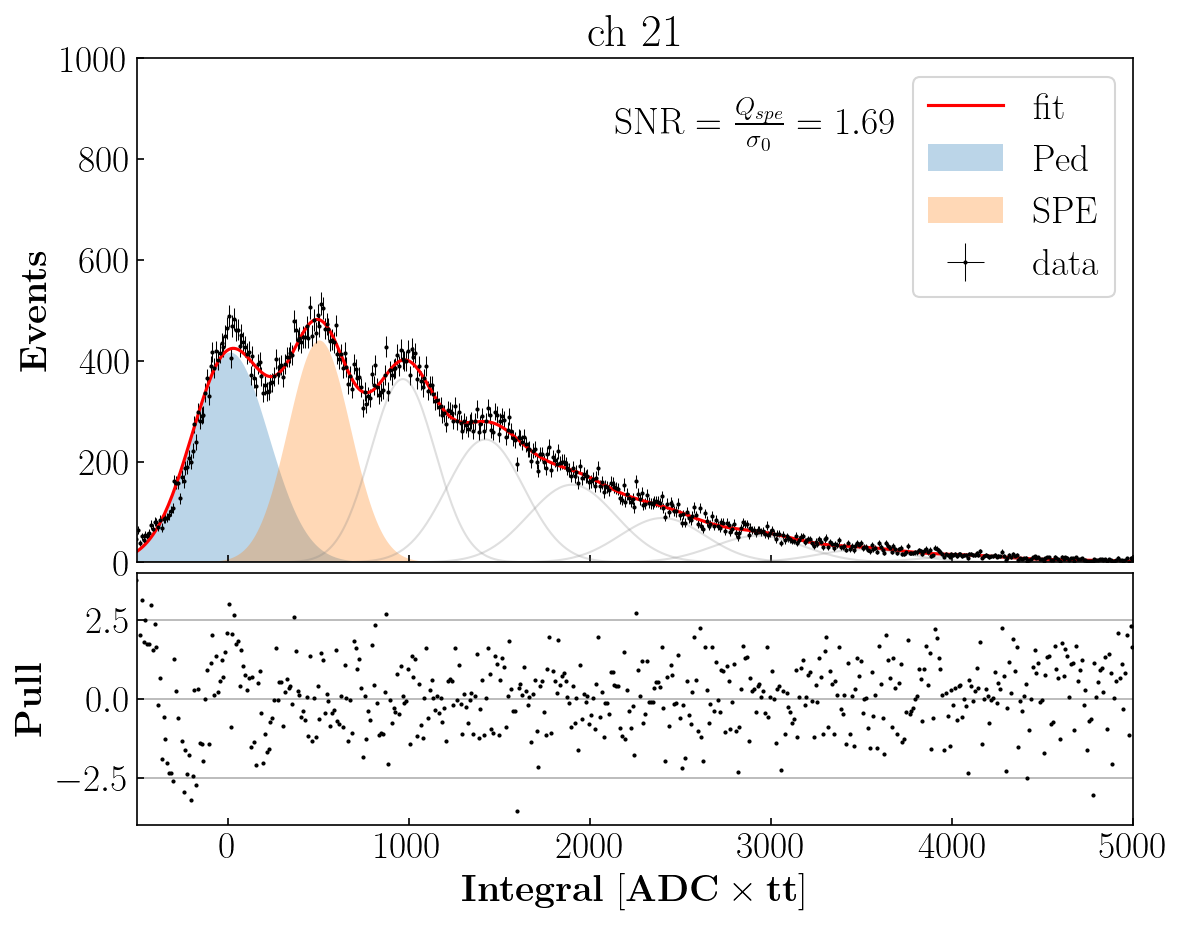

In [778]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum10(xx2, *msum.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum10(b, *msum.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 1000)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 21}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum.values['mu0']
xspe = msum.values['mu1']
sig0 = msum.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 1.69$', transform=ax1.transAxes)

In [752]:
a, b = h10[0], h10[1][:-1] + (h10[1][1] - h10[1][0])/2

b = b[a>0]
a = a[a>0]

b= b[75:]
a= a[75:]

lsq2 = LeastSquares(b, a, np.sqrt(a), gsum10)
msum2 = Minuit(lsq2, mu0 = 0 , sig0=30, N0=7e3,
              mu1 =400 , sig1=30, N1=5e3,
              mu2 = 800 , sig2=50, N2=0.5e3,
              mu3 = 1200 , sig3=50, N3=0.5e3,
              mu4 = 1600 , sig4=50, N4=0.5e3,
              mu5 = 2000 , sig5=100, N5=0.3e3,
              mu6 = 2400 , sig6=100, N6=0.02e3,
              mu7 = 2800 , sig7=150, N7=0.02e3,
              mu8 = 3200 , sig8=150, N8=0.02e3,
              mu9 = 3600 , sig9=150, N9=110,
              mu10 = 5500 , sig10=150, N10=0)

msum2.errordef = 1

msum2.limits['sig0'] = [20, 150]
msum2.limits['sig1'] = [20, 150]
msum2.limits['sig2'] = [50, 150]
msum2.limits['sig3'] = [50, 150]
msum2.limits['sig4'] = [50, 200]
msum2.limits['sig5'] = [50, 200]
msum2.limits['sig6'] = [50, 250]
msum2.limits['sig7'] = [50, 250]
msum2.limits['sig8'] = [50, 250]
msum2.limits['sig9'] = [50, 250]
msum2.limits['sig10'] = [50, 400]

msum2.limits['mu0'] = [-30, 30]
msum2.limits['mu1'] = [200, 600]
msum2.limits['mu2'] = [600, 1000]
msum2.limits['mu3'] = [1000, 1400]
msum2.limits['mu4'] = [1400, 1800]
msum2.limits['mu5'] = [1800, 2200]
msum2.limits['mu6'] = [2200, 2600]

msum2.limits['N0'] = [100, 10e3]
msum2.limits['N1'] = [100, 5e3]
msum2.limits['N2'] = [100, 5e3]
msum2.limits['N3'] = [100, 5e3]
msum2.limits['N4'] = [100, 5e3]
msum2.limits['N5'] = [100, 3e3]
msum2.limits['N6'] = [10, 3e3]
msum2.limits['N7'] = [10, 1e3]
msum2.limits['N8'] = [10, 7e2]
msum2.limits['N9'] = [10, 7e2]
#msum2.fixed['N9'] = True
msum2.fixed['N10'] = True

msum2.limits['N9'] = [10, 7e2]
msum2.limits['N10'] = [10, 7e2]

msum2.migrad()
msum2.hesse()
msum2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 751.8 (χ²/ndof = 1.5)      │             Nfcn = 12834             │
│ EDM = 5.73e-05 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu0   │    1.2    │    0.5    │            │            │   -30   │   30    │       │
│ 1 │ sig0  │   85.41   │   0.33    │            │            │   20    │   150   │       │
│ 2 │ N0    │  2.871e3  │  0.017e3  │            │            │   100   │  10000  │       │
│ 3 │ mu1   │   411.8   │    0.6    │            │            │   200   │   600   │       │
│ 4 │ sig1  │   112.3   │    0.8    │            │            │   20    │   150   │       │
│ 5 │ N1    │  2.717e3  │  0.024e3  │            │            │   100   │  5000   │       │
│ 6 │ mu2   │   810.4   │    1.0    │            │            │   600   │  1000   │       │
│ 7 │ sig2  │   143.8   │    1.5    │            │            │   50    │   150   │       │
│ 8 │ N2    │  1.828e3  │  0.018e3  │            │            │   100   │  5000   │       │
│ 9 │ mu3   │ 1.1726e3  │ 0.0022e3  │            │            │  1000   │  1400   │       │
│ 10│ sig3  │   150.0   │    0.7    │            │            │   50    │   150   │       │
│ 11│ N3    │  1.179e3  │  0.015e3  │            │            │   100   │  5000   │       │
│ 12│ mu4   │ 1.5317e3  │ 0.0031e3  │            │            │  1400   │  1800   │       │
│ 13│ sig4  │    182    │     7     │            │            │   50    │   200   │       │
│ 14│ N4    │    742    │    12     │            │            │   100   │  5000   │       │
│ 15│ mu5   │  1.896e3  │  0.005e3  │            │            │  1800   │  2200   │       │
│ 16│ sig5  │    157    │    10     │            │            │   50    │   200   │       │
│ 17│ N5    │    426    │    10     │            │            │   100   │  3000   │       │
│ 18│ mu6   │  2.253e3  │  0.009e3  │            │            │  2200   │  2600   │       │
│ 19│ sig6  │    190    │    16     │            │            │   50    │   250   │       │
│ 20│ N6    │    230    │     6     │            │            │   10    │  3000   │       │
│ 21│ mu7   │  2.629e3  │  0.016e3  │            │            │         │         │       │
│ 22│ sig7  │    250    │    22     │            │            │   50    │   250   │       │
│ 23│ N7    │    122    │     6     │            │            │   10    │  1000   │       │
│ 24│ mu8   │  3.124e3  │  0.017e3  │            │            │         │         │       │
│ 25│ sig8  │    250    │     4     │            │            │   50    │   250   │       │
│ 26│ N8    │   58.0    │    2.7    │            │            │   10    │   700   │       │
│ 27│ mu9   │  3.639e3  │  0.024e3  │            │            │         │         │       │
│ 28│ sig9  │   250.0   │    2.3    │            │            │   50    │   250   │       │
│ 29│ N9    │   24.1    │    1.6    │            │            │   10    │   700   │       │
│ 30│ mu10  │  4.28e3   │  0.04e3   │            │  

In [780]:
spevals["36"] = 411.8
speerrs["36"] = 0.6

4.821209921854555


Text(0.48, 0.85, '$\\mathrm{SNR} = \\frac{Q_{spe}}{\\sigma_0} = 4.82$')

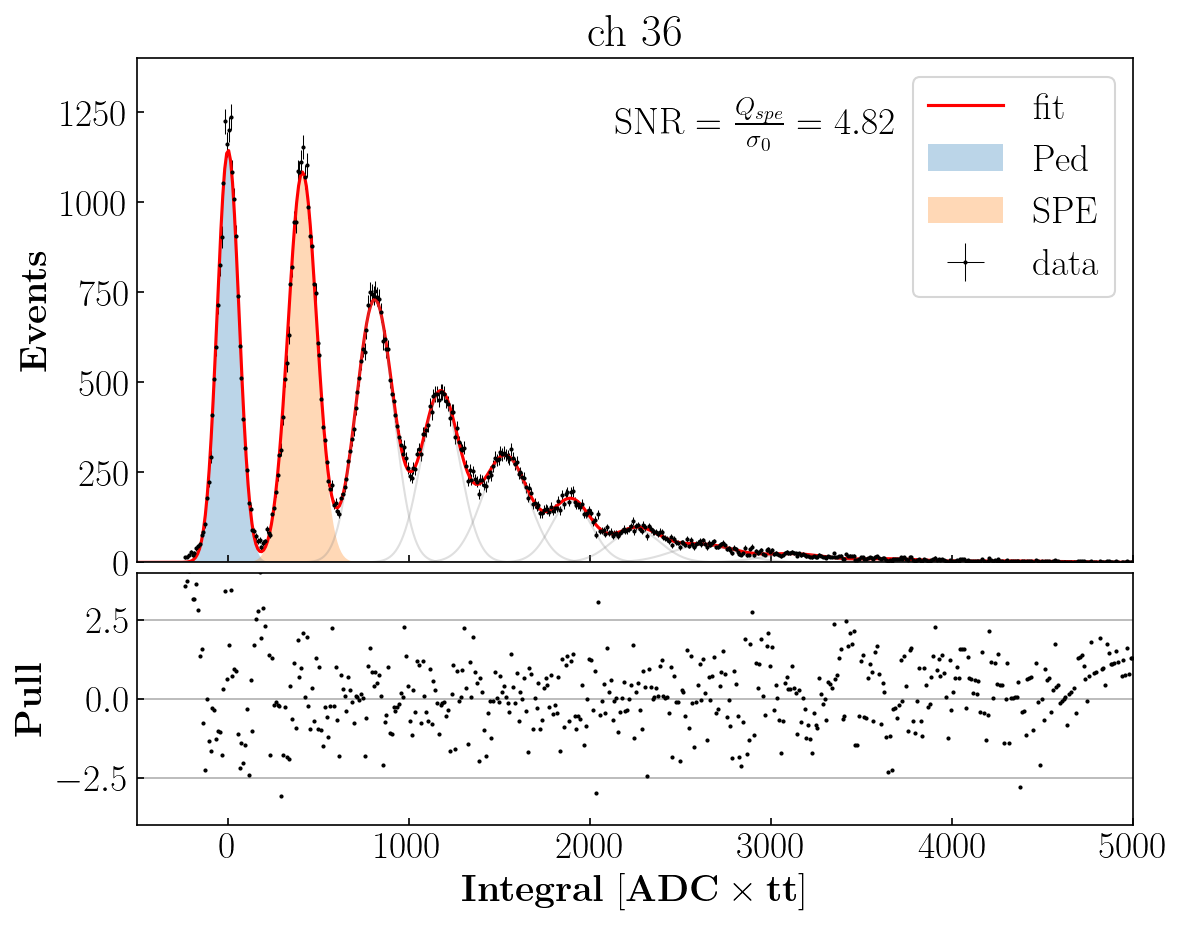

In [756]:
fig= plt.figure(figsize=[8, 7], dpi=150)

rect1 = [0.12, 0.1, 0.83, 0.24]
rect2 = [0.12, 0.35, 0.83, 0.48]

ax1 = fig.add_axes(rect2)
ax2 = fig.add_axes(rect1)
ax1.xaxis.set_tick_params(labelbottom=False)

xx2 = np.linspace(-500, 7e3, 700)
ax1.errorbar(b, a, yerr=np.sqrt(a), xerr=0, ls='', marker='o', color='k', ms=1, lw=0.5, label=r'$\mathrm{data}$')
ax1.plot(xx2, gsum10(xx2, *msum2.values), color='r', label=r'$\mathrm{fit}$')

resid = (a - gsum10(b, *msum2.values))/np.sqrt(a)
ax2.errorbar(b, resid, xerr=0, yerr=0, color='k', marker='o', ls='', ms=1)

ax1.set_xlim(-0.5e3, 5e3)
ax1.set_ylim(0, 1400)
ax2.set_xlim(-0.5e3, 5e3)

ax2.set_ylim(-4, 4)
ax2.grid(axis='y')

ax1.fill_between(xx2, gaus(xx2, *msum2.values[:3]), alpha=0.3, label=r'$\mathrm{Ped}$')
ax1.fill_between(xx2, gaus(xx2, *msum2.values[3:6]), alpha=0.3, label=r'$\mathrm{SPE}$')

for i in range(2, 9):
    ax1.plot(xx2, gaus(xx2, *msum2.values [i*3:i*3+3]), color='gray', lw=1, alpha=0.25)

ax1.set_title(r"$\mathrm{ch\ 36}$")
ax1.legend(loc='best')

ax1.set_ylabel(r"$\mathrm{\bf Events}$")
ax2.set_xlabel(r"$\mathrm{\bf Integral\ [ADC\times tt]}$")
ax2.set_ylabel(r"$\mathrm{\bf Pull }$")

xped = msum2.values['mu0']
xspe = msum2.values['mu1']
sig0 = msum2.values['sig0']
print(xspe/sig0)

ax1.text(0.48, 0.85, r'$\mathrm{SNR} = \frac{Q_{spe}}{\sigma_0} = 4.82$', transform=ax1.transAxes)

Text(0, 0.5, '$\\mathrm{\\bf Integral, [ADC \\times tt]}$')

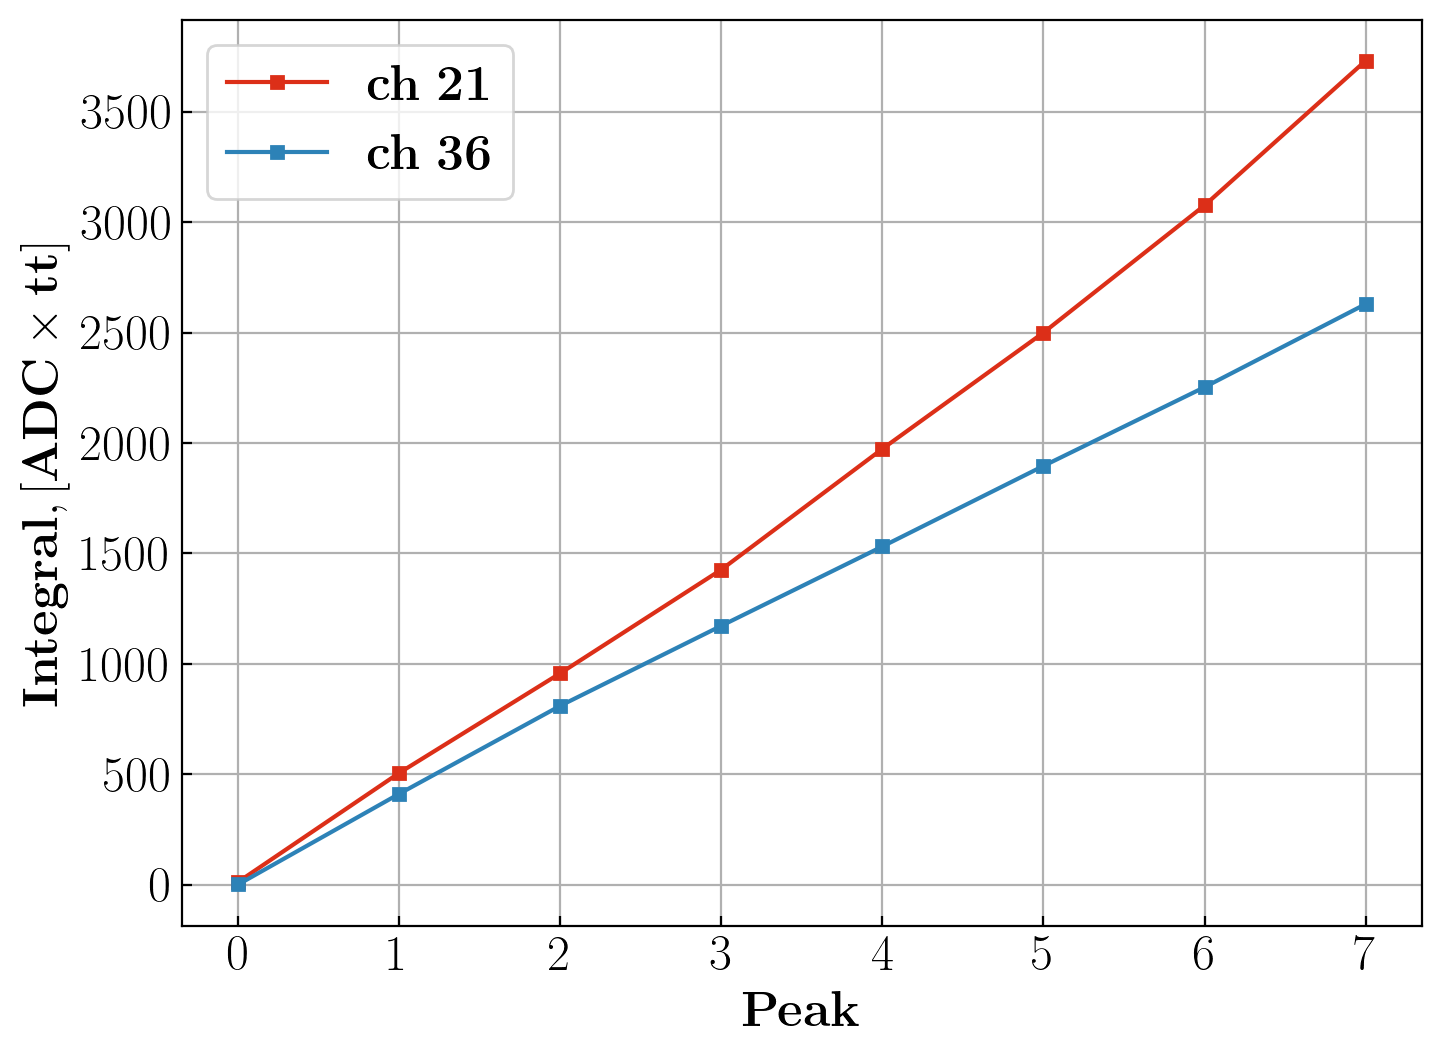

In [760]:
fig, ax = plt.subplots(figsize=[8,6], dpi=200)

pks = np.arange(11)
pks1 = np.arange(8)

ax.plot(pks1, msum.values[0::3][:8], color=c1, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 21}$')
ax.plot(pks1, msum2.values[0::3][:8], color=c2, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 36}$')

#ax.plot(pks1, msum3.values[0::3][:8], color=c3, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 7}$')
#ax.plot(pks1, msum4.values[0::3][:8], color=c4, marker='s', ms=4, label=r'$\mathrm{\bf ch\ 0}$')

ax.grid(axis='both')
ax.legend(loc='best')

ax.set_xlabel(r"$\mathrm{\bf Peak}$")
ax.set_ylabel(r"$\mathrm{\bf Integral, [ADC \times tt]}$")

In [781]:
spevals

{'10': 765.9,
 '17': 553.8,
 '7': 440,
 '0': 371,
 '30': 389.8,
 '27': 192,
 '20': 145,
 '37': 336,
 '21': 506,
 '36': 411.8}

In [782]:
speerrs

{'10': 1.0,
 '17': 1.4,
 '7': 7.0,
 '0': 7,
 '30': 3.4,
 '27': 22,
 '20': 2.9,
 '37': 6,
 '21': 5,
 '36': 0.6}

[765.9, 553.8, 440, 371, 389.8, 192, 145, 336, 506, 411.8] [1.0, 1.4, 7.0, 7, 3.4, 22, 2.9, 6, 5, 0.6]
['10', '17', '7', '0', '30', '27', '20', '37', '21', '36']


Text(0, 0.5, '$\\mathrm{\\bf SPE}$')

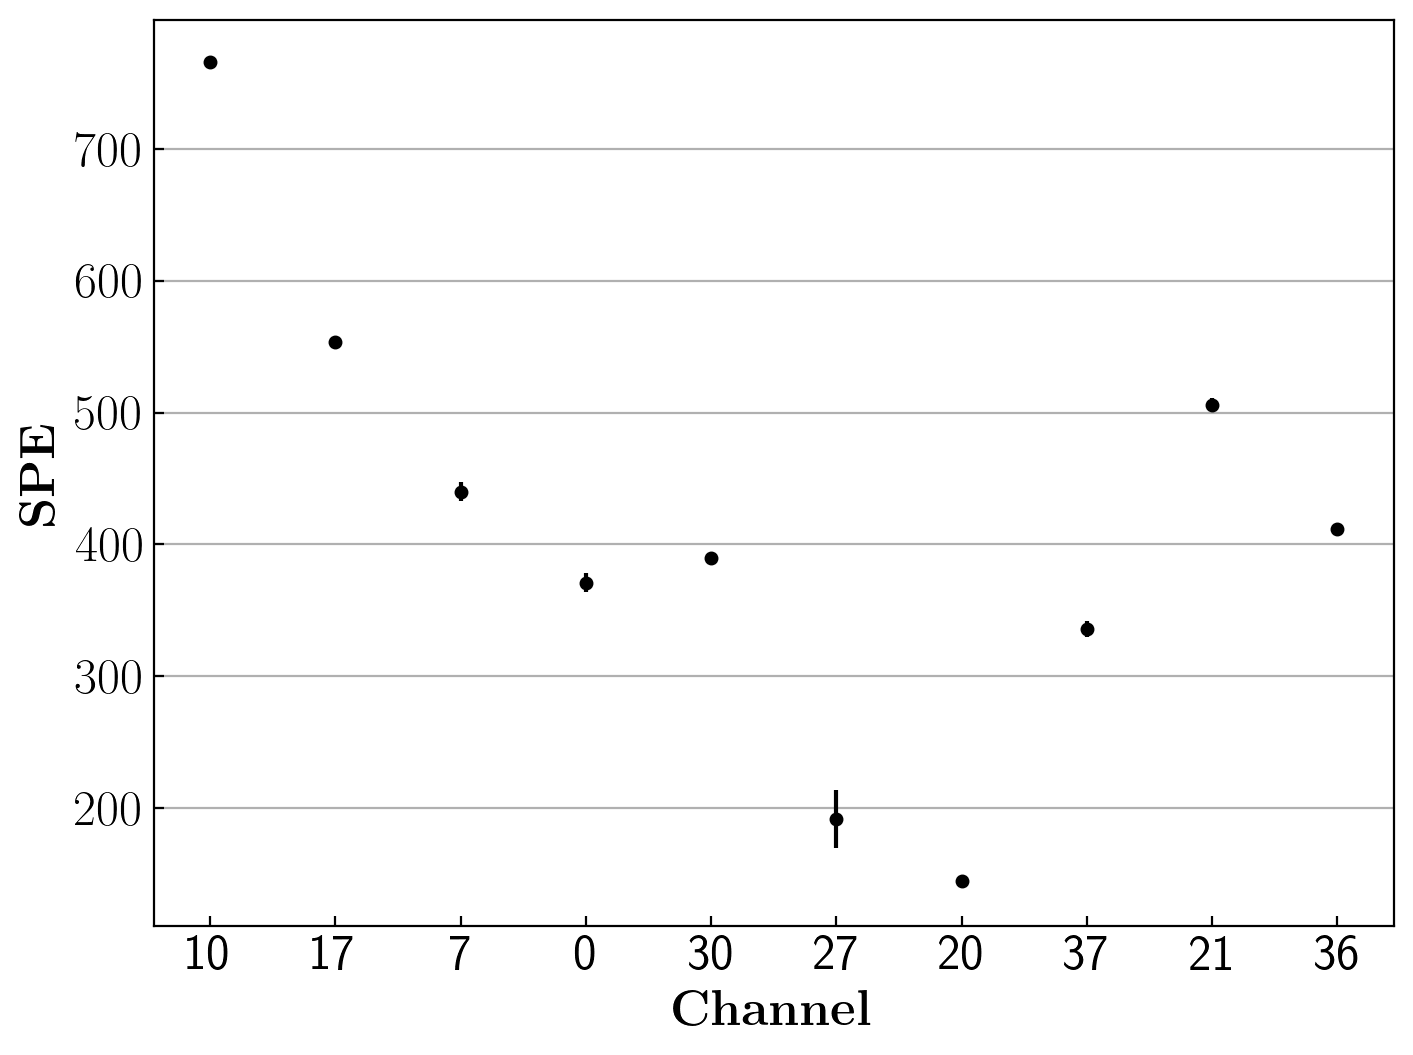

In [792]:
fig, ax = plt.subplots(figsize=[8,6], dpi=200)
vals = [spevals[i] for i in spevals]
errs = [speerrs[i] for i in speerrs]
channels = [i for i in speerrs]
print(vals, errs)
print(channels)

ax.errorbar(np.arange(10), vals, xerr=0, yerr=errs, marker='o', ms=4, color='k', ls='')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(channels)

ax.grid(axis='y')

ax.set_xlabel(r"$\mathrm{\bf Channel}$")
ax.set_ylabel(r"$\mathrm{\bf SPE}$")


In [651]:
runNo=24089
src = 1
ch = 7
filename = f"/Users/vitaliy/Desktop/daq/mdoc/caldata/adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0000.npy"
dat0 = np.load(filename, allow_pickle=True)
filename = f"/Users/vitaliy/Desktop/daq/mdoc/caldata/adc_data_run_{runNo}_srcid_{src}_ch_{ch}_0001.npy"
dat1 = np.load(filename, allow_pickle=True)

ch7 = np.concatenate([dat0, dat1])

del dat0, dat1

In [42]:
evts = ch7.shape[0]
ch7 = ch7.reshape(evts*16, int(ch7.shape[1]/16))
ch7 = ch7[:, 2350:2800]
peds = np.array([np.argmax(np.bincount(ch7[i])) for i in range(len(ch7))])
peds = peds[:, np.newaxis]
ch7 = ch7 - peds

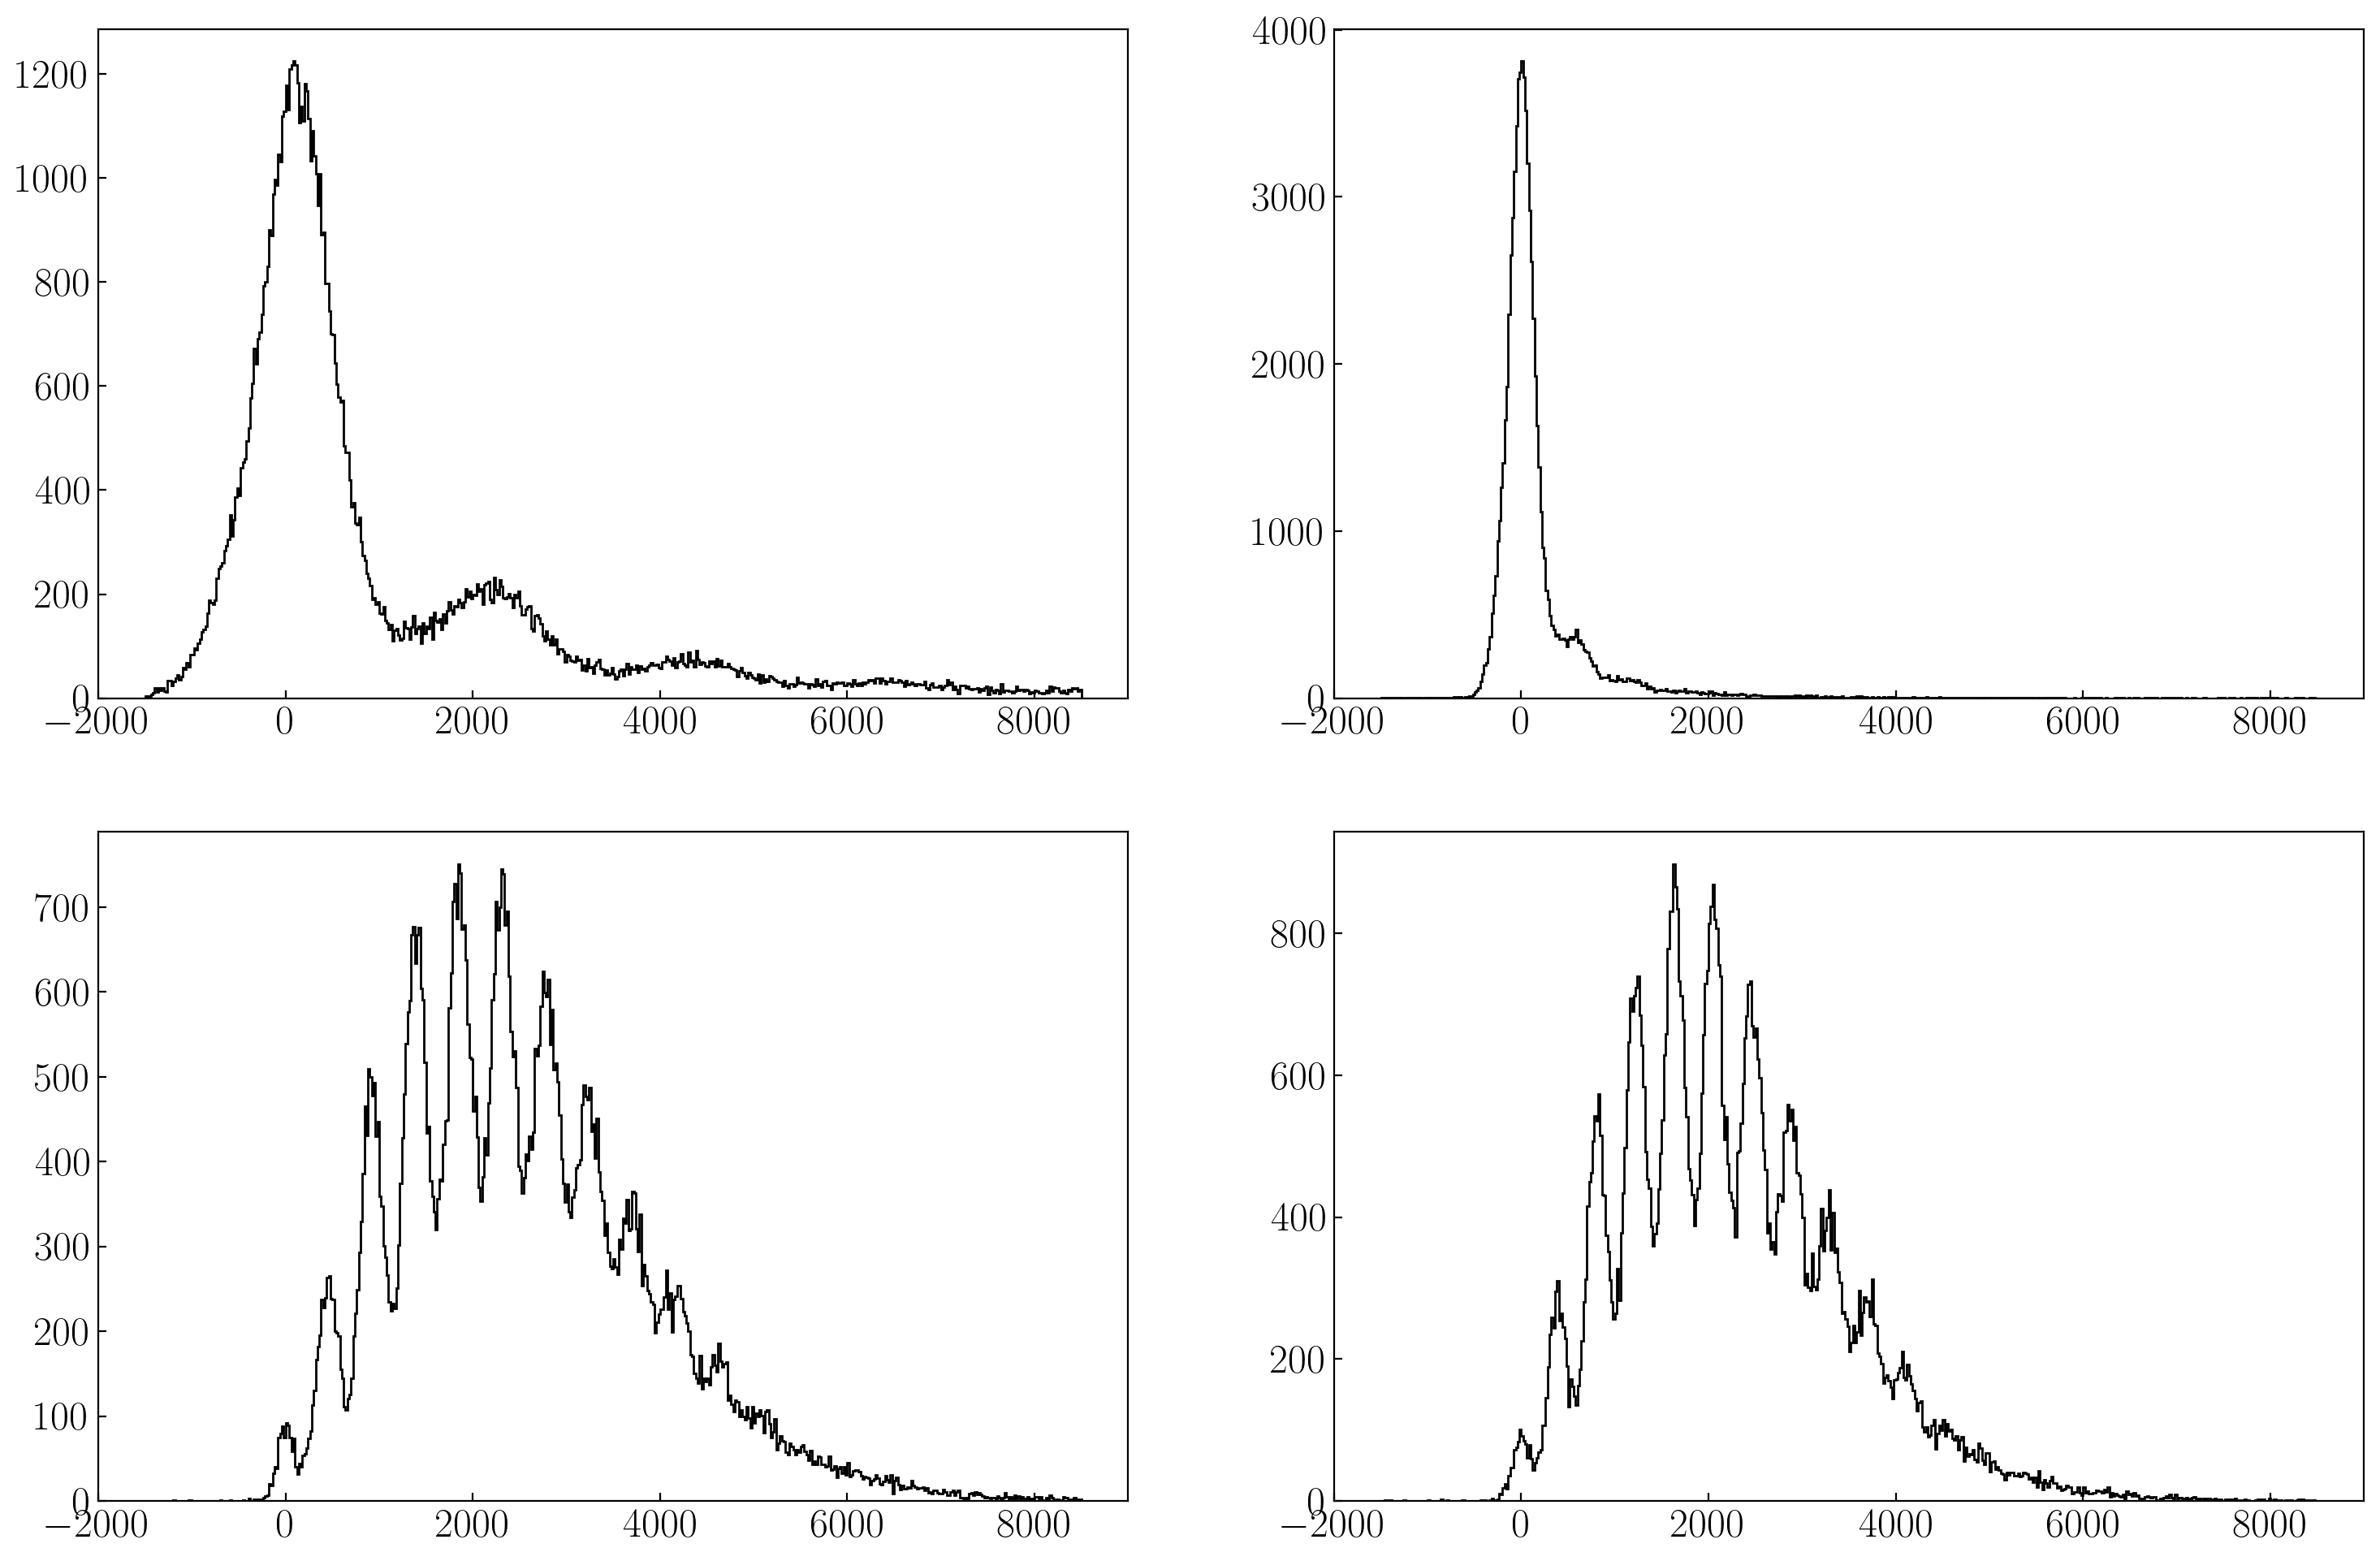

In [43]:
fig, axs = plt.subplots(2, 2, figsize=[18, 12], dpi=200)

h1 = axs[0,0].hist(np.sum(ch0[:, 175:225], axis=1), 500, [-1.5e3, 8.5e3], histtype='step', color='k')
h2 = axs[0,1].hist(np.sum(ch7[:, 175:225], axis=1), 500, [-1.5e3, 8.5e3], histtype='step', color='k')
h3 = axs[1,0].hist(np.sum(ch10[:, 175:225], axis=1), 500, [-1.5e3, 8.5e3], histtype='step', color='k')
h4 = axs[1,1].hist(np.sum(ch17[:, 175:225], axis=1), 500, [-1.5e3, 8.5e3], histtype='step', color='k')